## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


## Import Dataset

In [2]:
df = pd.read_csv('CICIOT2023.csv')

In [3]:
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitude,Radius,Covariance,Variance,Weight,label,Binary Class,Multiclass
0,0.000000,54.00,6,64.00,0.329807,0.329807,0.0,1,0,1,0,0,0,0,1.0,0.00,1.00,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1,1,567.00,54.00,54.0,54.000000,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood,Attack,DDoS
1,0.000000,57.04,6,64.00,4.290556,4.290556,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,1,0,0,0,0,0,0,1,0,0,0,0,1,1,581.33,54.00,66.3,54.796404,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood,Attack,DoS
2,0.000000,0.00,1,64.00,33.396799,33.396799,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1,1,1,441.00,42.00,42.0,42.000000,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood,Attack,DDoS
3,0.328175,76175.00,17,64.00,4642.133010,4642.133010,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,1,1,525.00,50.00,50.0,50.000000,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood,Attack,DoS
4,0.117320,101.73,6,65.91,6.202211,6.202211,0.0,0,1,0,0,0,0,0,0.0,1.01,0.04,0.0,0.02,0,0,0,0,0,0,0,1,0,0,0,0,1,1,644.60,57.88,131.6,67.959230,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood,Attack,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332060,0.000000,54.00,6,64.00,13.160665,13.160665,0.0,0,0,0,1,1,0,0,0.0,0.00,0.00,1.0,1.00,0,0,0,0,0,0,0,1,0,0,0,0,1,1,567.00,54.00,54.0,54.000000,0.000000,54.00,8.333126e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood,Attack,DDoS
7332061,0.233475,17453.70,17,67.82,30034.276124,30034.276124,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,1,1,550.08,50.00,71.0,51.694067,5.231095,52.46,8.301637e+07,9.5,10.157898,7.413133,264.972492,0.12,141.55,DoS-UDP_Flood,Attack,DoS
7332062,0.000000,54.00,6,64.00,0.953451,0.953451,0.0,0,0,0,1,1,0,0,0.0,0.00,0.00,1.0,1.00,0,0,0,0,0,0,0,1,0,0,0,0,1,1,567.00,54.00,54.0,54.000000,0.000000,54.00,8.333178e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood,Attack,DDoS
7332063,0.000000,54.00,6,64.00,14.870483,14.870483,0.0,1,0,1,0,0,0,0,1.0,0.00,1.00,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1,1,567.00,54.00,54.0,54.000000,0.000000,54.00,8.334401e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood,Attack,DDoS


## Initial Data Exploration

In [4]:
df.shape

(7332065, 49)

In [5]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitude', 'Radius', 'Covariance', 'Variance', 'Weight', 'label',
       'Binary Class', 'Multiclass'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7332065 entries, 0 to 7332064
Data columns (total 49 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    int64  
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  int64  
 8   syn_flag_number  int64  
 9   rst_flag_number  int64  
 10  psh_flag_number  int64  
 11  ack_flag_number  int64  
 12  ece_flag_number  int64  
 13  cwr_flag_number  int64  
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             int64  
 20  HTTPS            int64  
 21  DNS              int64  
 22  Telnet           int64  
 23  SMTP             int64  
 24  SSH              int64  
 25  IRC              int64  
 26  TCP              int64  
 27  UDP         

In [7]:
desc = df.describe()
desc

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitude,Radius,Covariance,Variance,Weight
count,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7332065.0,7.332065e+06,7.332065e+06,7332065.0,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06
mean,5.665392e+00,7.677188e+04,8.938499e+00,6.636020e+01,9.048908e+03,9.048908e+03,6.653788e-06,8.644945e-02,2.071474e-01,9.039568e-02,8.773163e-02,1.234557e-01,1.500259e-06,5.455489e-07,9.039494e-02,3.301551e-01,9.891267e-02,6.242328e+00,3.852883e+01,4.813814e-02,5.521800e-02,1.312045e-04,0.0,1.363872e-07,4.473501e-05,0.0,5.735800e-01,2.120956e-01,2.045808e-06,6.642058e-05,1.637423e-01,9.998878e-01,9.998878e-01,1.309478e+03,9.165610e+01,1.822480e+02,1.247852e+02,3.342336e+01,1.247721e+02,8.318999e+07,9.498828e+00,1.312582e+01,4.723453e+01,3.083961e+04,9.657781e-02,1.415216e+02
std,2.679480e+02,4.610857e+05,8.892750e+00,1.405783e+01,9.990272e+04,9.990272e+04,1.048646e-02,2.810266e-01,4.052621e-01,2.867478e-01,2.829042e-01,3.289595e-01,1.224850e-03,7.386127e-04,2.861521e-01,6.633436e-01,3.230961e-01,7.197325e+01,3.257473e+02,2.140581e-01,2.284053e-01,1.145370e-02,0.0,3.693064e-04,6.688274e-03,0.0,4.945564e-01,4.087922e-01,1.430316e-03,8.149612e-03,3.700416e-01,1.059406e-02,1.059406e-02,2.616241e+03,1.398785e+02,5.252399e+02,2.414377e+02,1.606277e+02,2.417372e+02,1.705661e+07,8.197718e-01,8.635737e+00,2.271810e+02,3.269333e+05,2.332028e-01,2.108165e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.093474e+00,2.093474e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,5.250000e+02,5.000000e+01,5.000000e+01,5.000000e+01,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.578358e+01,1.578358e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,5.670000e+02,5.400000e+01,5.400000e+01,5.400000e+01,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75%,1.049605e-01,2.968900e+02,1.400000e+01,6.400000e+01,1.178850e+02,1.178850e+02,0.000000e+00,0.

In [8]:
# List of columns you are interested in
columns_of_interest = ['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']

# Subset the DataFrame to include only these columns
selected_columns = df[columns_of_interest]

# Get the descriptive statistics for these specific columns
desc = selected_columns.describe()

In [9]:
desc

,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC
count,7.332065e+06,7.332065e+06,7.332065e+06,7332065.0,7.332065e+06,7.332065e+06,7332065.0,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06,7.332065e+06
mean,4.813814e-02,5.521800e-02,1.312045e-04,0.0,1.363872e-07,4.473501e-05,0.0,5.735800e-01,2.120956e-01,2.045808e-06,6.642058e-05,1.637423e-01,9.998878e-01,9.998878e-01
std,2.140581e-01,2.284053e-01,1.145370e-02,0.0,3.693064e-04,6.688274e-03,0.0,4.945564e-01,4.087922e-01,1.430316e-03,8.149612e-03,3.700416e-01,1.059406e-02,1.059406e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
# Assuming 'desc' is your DataFrame obtained from df.describe()
min_max = desc.loc[['min', 'max']]
min_max

,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Check Duplicated Values

In [11]:
duplicate = df.duplicated().sum()

In [12]:
duplicate

3

In [13]:
duplicated_rows =  df[df.duplicated(keep=False)]
duplicated_rows

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitude,Radius,Covariance,Variance,Weight,label,Binary Class,Multiclass
584805,0.0,54.0,6,64.0,11.393215,11.393215,0.0,0,0,0,1,1,0,0,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,567.0,54.0,54.0,54.0,0.0,54.0,8.331453e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-PSHACK_Flood,Attack,DDoS
5033145,0.0,0.0,1,64.0,1.502211,1.502211,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,441.0,42.0,42.0,42.0,0.0,42.0,8.314975e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood,Attack,DDoS
5093892,0.0,54.0,6,64.0,11.393215,11.393215,0.0,0,0,0,1,1,0,0,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,567.0,54.0,54.0,54.0,0.0,54.0,8.331453e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-PSHACK_Flood,Attack,DDoS
5369161,0.0,0.0,1,64.0,1.502211,1.502211,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,441.0,42.0,42.0,42.0,0.0,42.0,8.314975e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood,Attack,DDoS
6844584,0.0,54.0,6,64.0,20.370538,20.370538,0.0,1,0,1,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,567.0,54.0,54.0,54.0,0.0,54.0,8.334091e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-RSTFINFlood,Attack,DDoS
7244562,0.0,54.0,6,64.0,20.370538,20.370538,0.0,1,0,1,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,567.0,54.0,54.0,54.0,0.0,54.0,8.334091e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-RSTFINFlood,Attack,DDoS


## Packet Flow Characteristics Analysis

### Binary Classification

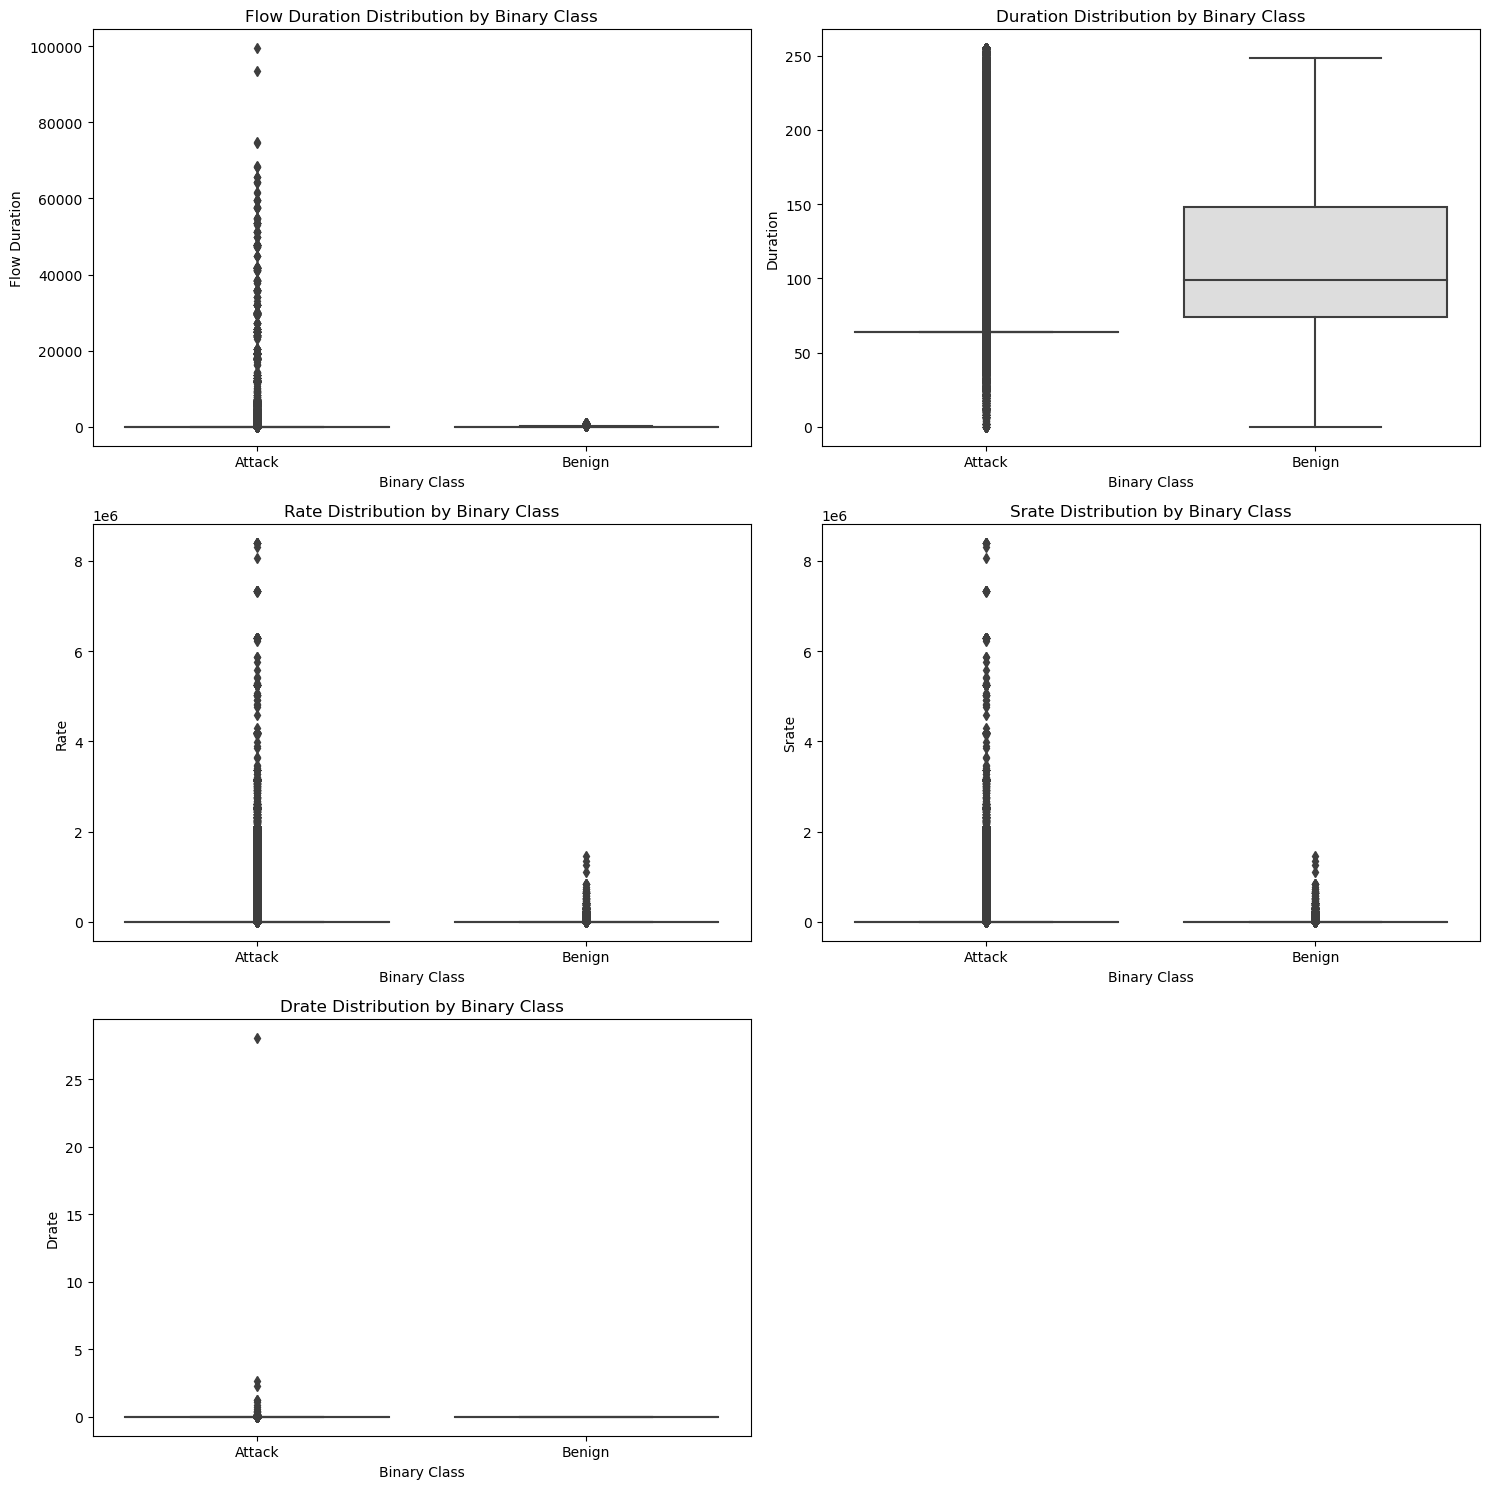

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
colors = ['#C40C0C', '#DDDDDD']

# Plot boxplots for each feature separated by binary class
sns.boxplot(data=df, x='Binary Class', y='flow_duration', ax=axes[0, 0], palette=colors)
axes[0, 0].set_title('Flow Duration Distribution by Binary Class')
axes[0, 0].set_xlabel('Binary Class')
axes[0, 0].set_ylabel('Flow Duration')

sns.boxplot(data=df, x='Binary Class', y='Duration', ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('Duration Distribution by Binary Class')
axes[0, 1].set_xlabel('Binary Class')
axes[0, 1].set_ylabel('Duration')

sns.boxplot(data=df, x='Binary Class', y='Rate', ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('Rate Distribution by Binary Class')
axes[1, 0].set_xlabel('Binary Class')
axes[1, 0].set_ylabel('Rate')

sns.boxplot(data=df, x='Binary Class', y='Srate', ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('Srate Distribution by Binary Class')
axes[1, 1].set_xlabel('Binary Class')
axes[1, 1].set_ylabel('Srate')

sns.boxplot(data=df, x='Binary Class', y='Drate', ax=axes[2, 0], palette=colors)
axes[2, 0].set_title('Drate Distribution by Binary Class')
axes[2, 0].set_xlabel('Binary Class')
axes[2, 0].set_ylabel('Drate')

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


### Multiclass Classification

In [15]:
df['Multiclass'].value_counts()

Multiclass
DDoS          5338243
DoS           1269264
Mirai          413754
Benign         172642
Spoofing        76807
Recon           55531
Web              3836
BruteForce       1988
Name: count, dtype: int64

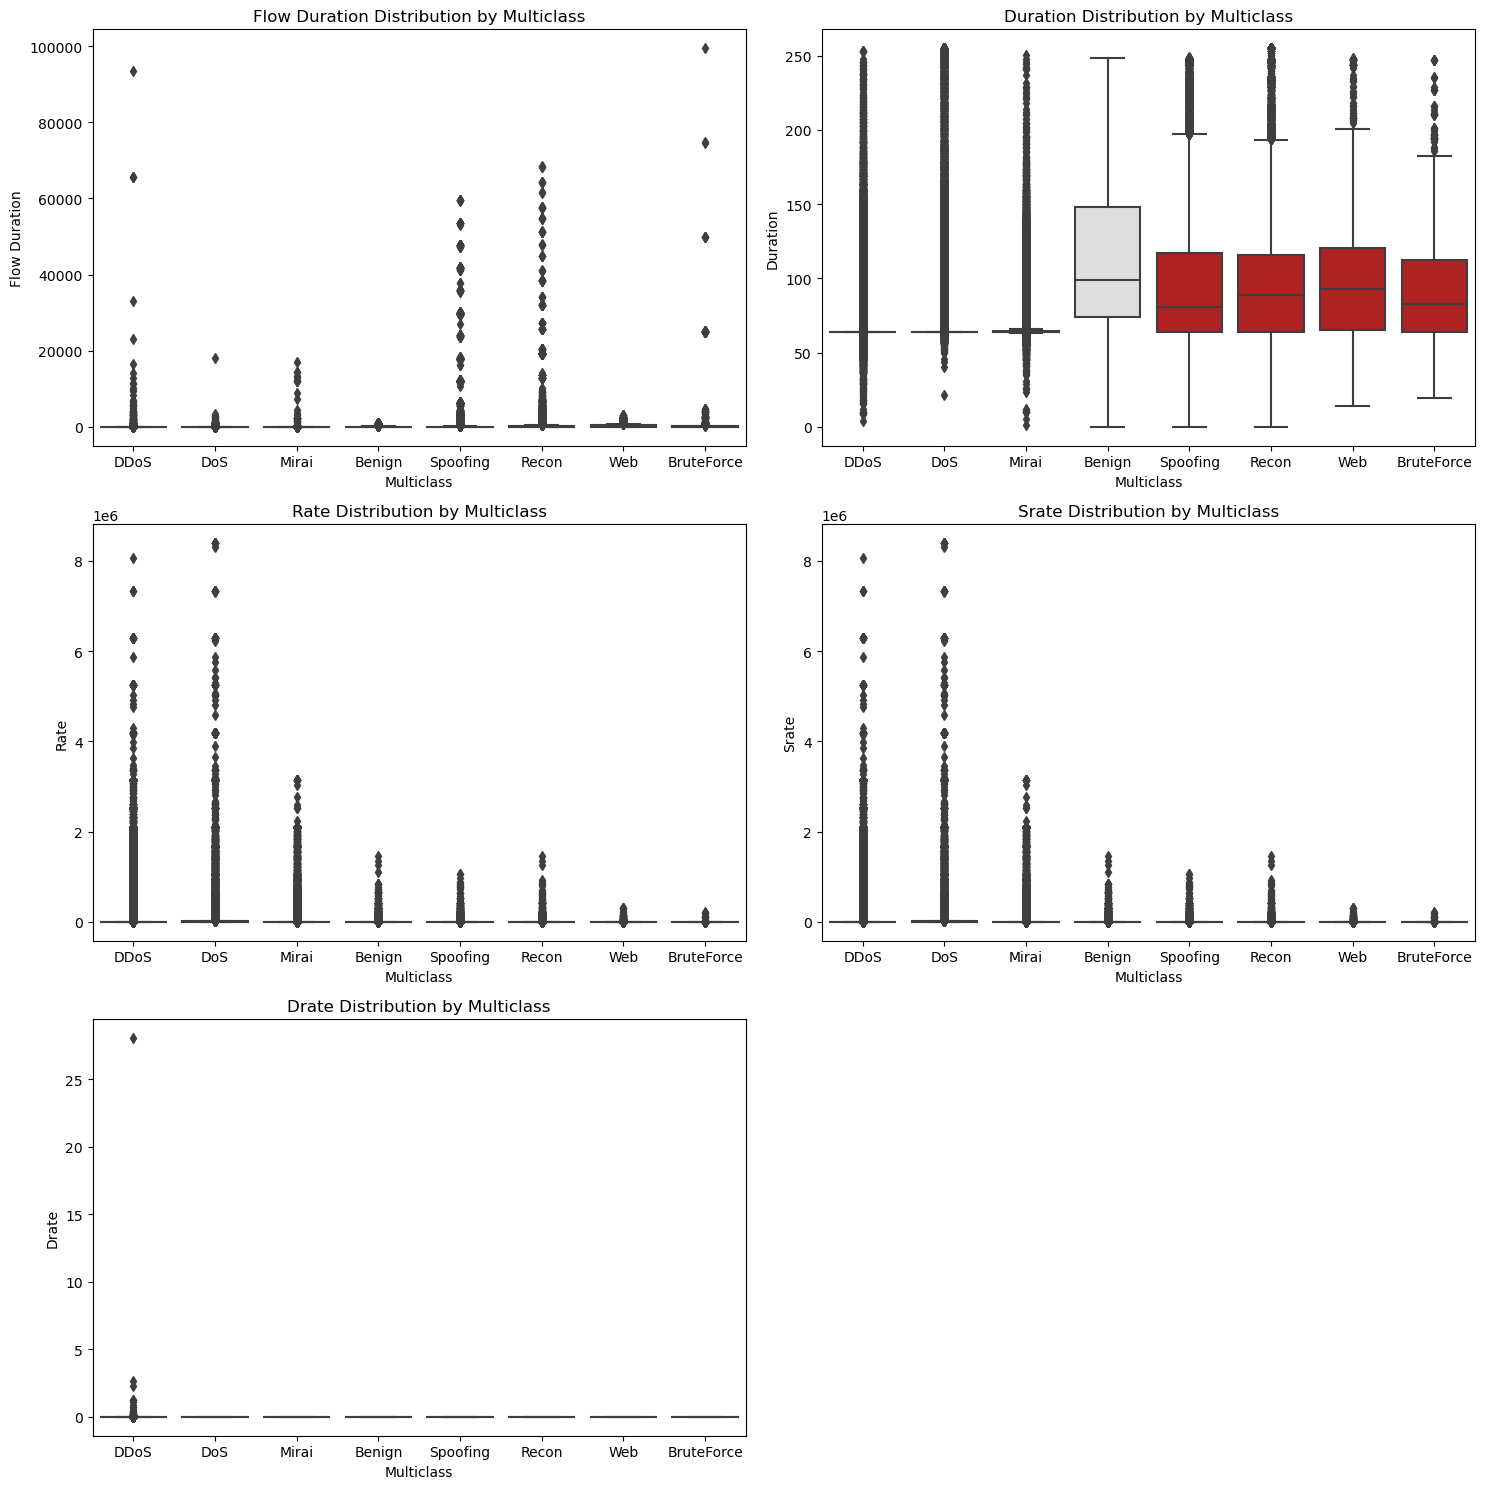

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the color palette
palette = {
    'DDoS': '#C40C0C',
    'DoS': '#C40C0C',
    'Mirai': '#C40C0C',
    'Benign': '#DDDDDD',  
    'Spoofing': '#C40C0C',
    'Recon': '#C40C0C',
    'Web': '#C40C0C',
    'BruteForce': '#C40C0C'
}
# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot boxplots for each feature separated by multiclass
sns.boxplot(data=df, x='Multiclass', y='flow_duration', ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('Flow Duration Distribution by Multiclass')
axes[0, 0].set_xlabel('Multiclass')
axes[0, 0].set_ylabel('Flow Duration')

sns.boxplot(data=df, x='Multiclass', y='Duration', ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Duration Distribution by Multiclass')
axes[0, 1].set_xlabel('Multiclass')
axes[0, 1].set_ylabel('Duration')

sns.boxplot(data=df, x='Multiclass', y='Rate', ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Rate Distribution by Multiclass')
axes[1, 0].set_xlabel('Multiclass')
axes[1, 0].set_ylabel('Rate')

sns.boxplot(data=df, x='Multiclass', y='Srate', ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Srate Distribution by Multiclass')
axes[1, 1].set_xlabel('Multiclass')
axes[1, 1].set_ylabel('Srate')

sns.boxplot(data=df, x='Multiclass', y='Drate', ax=axes[2, 0], palette=palette)
axes[2, 0].set_title('Drate Distribution by Multiclass')
axes[2, 0].set_xlabel('Multiclass')
axes[2, 0].set_ylabel('Drate')

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


## Packet Flow Flag and Count Analysis

In [17]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitude', 'Radius', 'Covariance', 'Variance', 'Weight', 'label',
       'Binary Class', 'Multiclass'],
      dtype='object')

In [18]:
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitude,Radius,Covariance,Variance,Weight,label,Binary Class,Multiclass
0,0.000000,54.00,6,64.00,0.329807,0.329807,0.0,1,0,1,0,0,0,0,1.0,0.00,1.00,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1,1,567.00,54.00,54.0,54.000000,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood,Attack,DDoS
1,0.000000,57.04,6,64.00,4.290556,4.290556,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,1,0,0,0,0,0,0,1,0,0,0,0,1,1,581.33,54.00,66.3,54.796404,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood,Attack,DoS
2,0.000000,0.00,1,64.00,33.396799,33.396799,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1,1,1,441.00,42.00,42.0,42.000000,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood,Attack,DDoS
3,0.328175,76175.00,17,64.00,4642.133010,4642.133010,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,1,1,525.00,50.00,50.0,50.000000,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood,Attack,DoS
4,0.117320,101.73,6,65.91,6.202211,6.202211,0.0,0,1,0,0,0,0,0,0.0,1.01,0.04,0.0,0.02,0,0,0,0,0,0,0,1,0,0,0,0,1,1,644.60,57.88,131.6,67.959230,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood,Attack,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332060,0.000000,54.00,6,64.00,13.160665,13.160665,0.0,0,0,0,1,1,0,0,0.0,0.00,0.00,1.0,1.00,0,0,0,0,0,0,0,1,0,0,0,0,1,1,567.00,54.00,54.0,54.000000,0.000000,54.00,8.333126e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood,Attack,DDoS
7332061,0.233475,17453.70,17,67.82,30034.276124,30034.276124,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,1,1,550.08,50.00,71.0,51.694067,5.231095,52.46,8.301637e+07,9.5,10.157898,7.413133,264.972492,0.12,141.55,DoS-UDP_Flood,Attack,DoS
7332062,0.000000,54.00,6,64.00,0.953451,0.953451,0.0,0,0,0,1,1,0,0,0.0,0.00,0.00,1.0,1.00,0,0,0,0,0,0,0,1,0,0,0,0,1,1,567.00,54.00,54.0,54.000000,0.000000,54.00,8.333178e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood,Attack,DDoS
7332063,0.000000,54.00,6,64.00,14.870483,14.870483,0.0,1,0,1,0,0,0,0,1.0,0.00,1.00,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1,1,567.00,54.00,54.0,54.000000,0.000000,54.00,8.334401e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood,Attack,DDoS


In [19]:
# Counting the occurrences of each category
flag_counts = df.pivot_table(index='fin_flag_number', values='Binary Class', aggfunc='count')
flag_counts = flag_counts.reset_index()


In [20]:
flag_counts = flag_counts.rename(columns={'Binary Class': 'Count of Flags Availability'})
flag_counts

,fin_flag_number,Count of Flags Availability
0,0,6698212
1,1,633853


### Binary Classification - Flag Availability

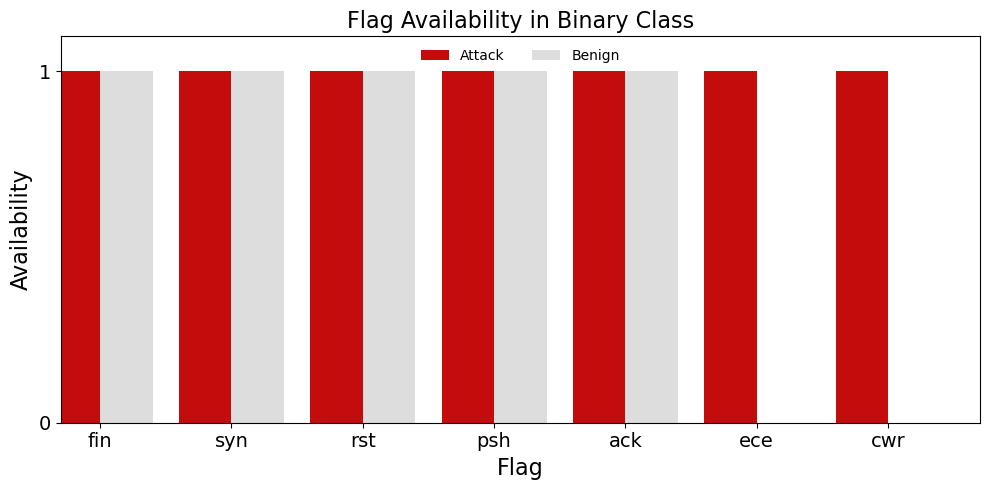

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define flag names without "_flag_number"
flags = ['fin', 'syn', 'rst', 'psh', 'ack', 'ece', 'cwr']

# Calculate flag presence (1 if present, 0 if not) for each Binary Class
# You will need to ensure that the DataFrame 'df' is defined and has the correct columns for this to work
flag_presence = {bc: df[df['Binary Class'] == bc][[f'{f}_flag_number' for f in flags]].any().astype(int).values
                 for bc in df['Binary Class'].unique()}

# Sort the Binary Class keys for consistent ordering
sorted_binary_class = sorted(flag_presence.keys())

# Set the figure size
plt.figure(figsize=(10, 5))

# Define custom color palette
colors = ['#C40C0C', '#DDDDDD']

# The amount of space each binary class category will occupy on the x-axis
total_width = 0.8
individual_width = total_width / len(sorted_binary_class)

# Define x-axis locations for each flag
x_locs = np.arange(len(flags))

# Plot the flag presence for each Binary Class and adjust the x-ticks
for i, bc in enumerate(sorted_binary_class):
    # Calculate the starting x-location for the current binary class
    start_loc = x_locs - (total_width / 2) + (i * individual_width)
    plt.bar(start_loc, flag_presence[bc], width=individual_width, label=bc, color=colors[i % len(colors)])
    
    # Adjust the x-ticks after plotting the second binary class (assuming 'Attack' is first and 'Benign' is second)
    if i == 1:  # This assumes that the second binary class plotted is 'Benign'
        center_locs = start_loc - (individual_width / 2)

# Set the x-ticks to be the center between the 'Attack' and 'Benign' bars for each flag
plt.xticks(center_locs, flags)

# Adjust x-axis limit to create space for the legend
plt.xlim(-0.5, len(flags) - 0.5)

# Set the y-ticks to show only 0 and 1
plt.yticks([0, 1], ['0', '1'])
plt.ylim(0, 1.1)

# Set labels and title
plt.xlabel('Flag', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Availability', fontsize=16)
plt.title('Flag Availability in Binary Class', fontsize=16)

# Add legend below the plot title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=len(sorted_binary_class), frameon=False)

# Ensure the plot does not cut off the legend or labels
plt.tight_layout()

# Show the plot
plt.show()


### Multiclass Classification - Flag Availability

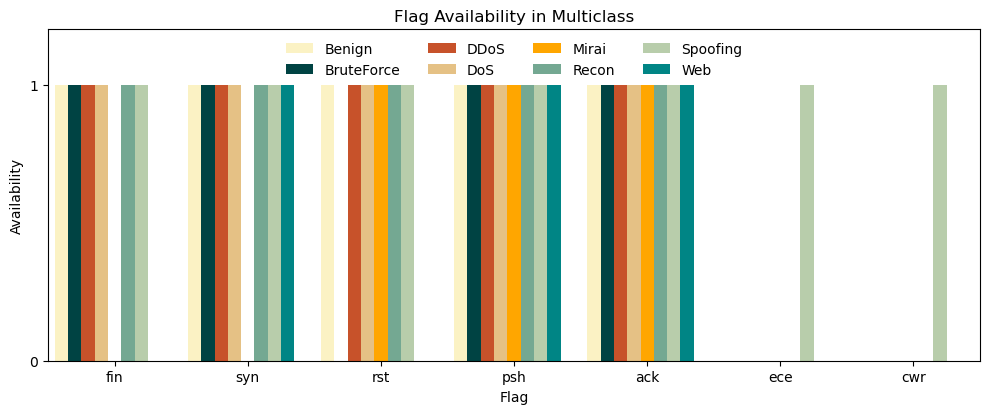

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define flag names without "_flag_number"
flags = ['fin', 'syn', 'rst', 'psh', 'ack', 'ece', 'cwr']

# Calculate flag presence (1 if present, 0 if not) for each Multiclass
flag_presence = {mc: df[df['Multiclass'] == mc][[f'{f}_flag_number' for f in flags]].any().astype(int).values
                 for mc in df['Multiclass'].unique()}

# Sort the Multiclass keys for consistent ordering
sorted_multiclass = sorted(flag_presence.keys())

# Set the figure size
plt.figure(figsize=(10, 5))


colors = {
    'DDoS': '#c7522a',
    'DoS': '#e5c185',
    'Mirai': '#ffa600',
    'Benign': '#fbf2c4',  
    'Spoofing': '#b8cdab',
    'Recon': '#74a892',
    'Web': '#008585',
    'BruteForce': '#004343'
}


# The amount of space each multiclass category will occupy on the x-axis
total_width = 0.8
individual_width = total_width / len(sorted_multiclass)

# Define x-axis locations for each flag
x_locs = np.arange(len(flags))

# Plot the flag presence for each Multiclass
for i, mc in enumerate(sorted_multiclass):
    # Calculate the starting x-location for the current multiclass
    start_loc = x_locs - (total_width / 2) + (i * individual_width)
    plt.bar(start_loc, flag_presence[mc], width=individual_width, label=mc, color=colors[mc])

# Set the x-ticks to be the center of each flag group
plt.xticks(x_locs, flags)

# Adjust x-axis limit to create space for the legend
plt.xlim(-0.5, len(flags) - 0.5)

# Set the y-ticks to show only 0 and 1
plt.yticks([0, 1], ['0', '1'])
plt.ylim(0, 1.2)

# Set labels and title
plt.xlabel('Flag')
plt.ylabel('Availability')
plt.title('Flag Availability in Multiclass')

# Add legend below the plot title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=len(sorted_multiclass) // 2, frameon=False)

# Ensure the plot does not cut off the legend or labels
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# Show the plot
plt.show() 


### Binary Classification - Flag Count

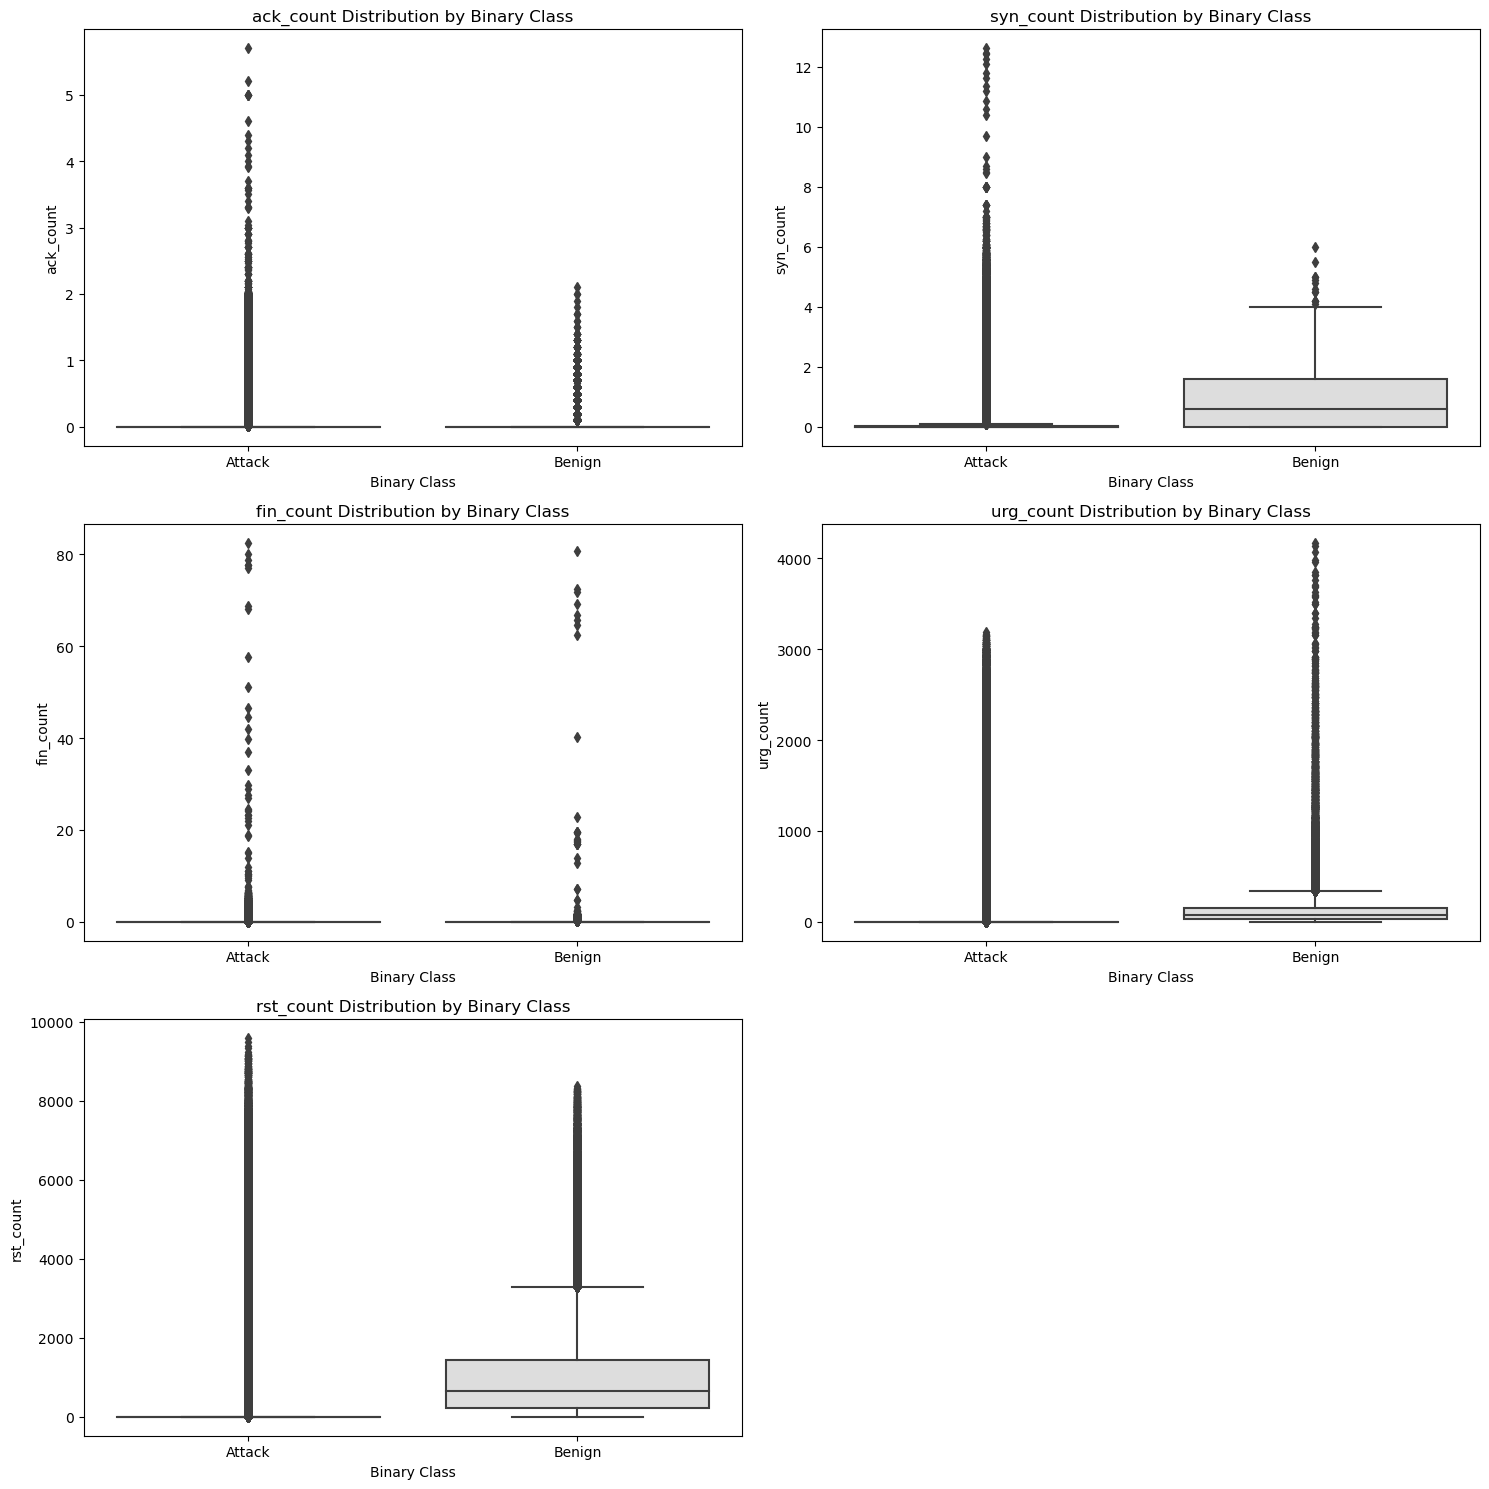

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the color palette
colors = {'Attack': '#C40C0C', 'Benign': '#DDDDDD'}

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot boxplots for each feature separated by binary class
sns.boxplot(data=df, x='Binary Class', y='ack_count', ax=axes[0, 0], palette=colors)
axes[0, 0].set_title('ack_count Distribution by Binary Class')
axes[0, 0].set_xlabel('Binary Class')
axes[0, 0].set_ylabel('ack_count')

sns.boxplot(data=df, x='Binary Class', y='syn_count', ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('syn_count Distribution by Binary Class')
axes[0, 1].set_xlabel('Binary Class')
axes[0, 1].set_ylabel('syn_count')

sns.boxplot(data=df, x='Binary Class', y='fin_count', ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('fin_count Distribution by Binary Class')
axes[1, 0].set_xlabel('Binary Class')
axes[1, 0].set_ylabel('fin_count')

sns.boxplot(data=df, x='Binary Class', y='urg_count', ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('urg_count Distribution by Binary Class')
axes[1, 1].set_xlabel('Binary Class')
axes[1, 1].set_ylabel('urg_count')

sns.boxplot(data=df, x='Binary Class', y='rst_count', ax=axes[2, 0], palette=colors)
axes[2, 0].set_title('rst_count Distribution by Binary Class')
axes[2, 0].set_xlabel('Binary Class')
axes[2, 0].set_ylabel('rst_count')

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


### Multiclass Classification - Flag Count

In [24]:
df2 = df[['ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'Multiclass']]
df2

,ack_count,syn_count,fin_count,urg_count,rst_count,Multiclass
0,1.0,0.00,1.00,0.0,0.00,DDoS
1,0.0,0.00,0.00,0.0,0.00,DoS
2,0.0,0.00,0.00,0.0,0.00,DDoS
3,0.0,0.00,0.00,0.0,0.00,DoS
4,0.0,1.01,0.04,0.0,0.02,DoS
...,...,...,...,...,...,...
7332060,0.0,0.00,0.00,1.0,1.00,DDoS
7332061,0.0,0.00,0.00,0.0,0.00,DoS
7332062,0.0,0.00,0.00,1.0,1.00,DDoS
7332063,1.0,0.00,1.00,0.0,0.00,DDoS


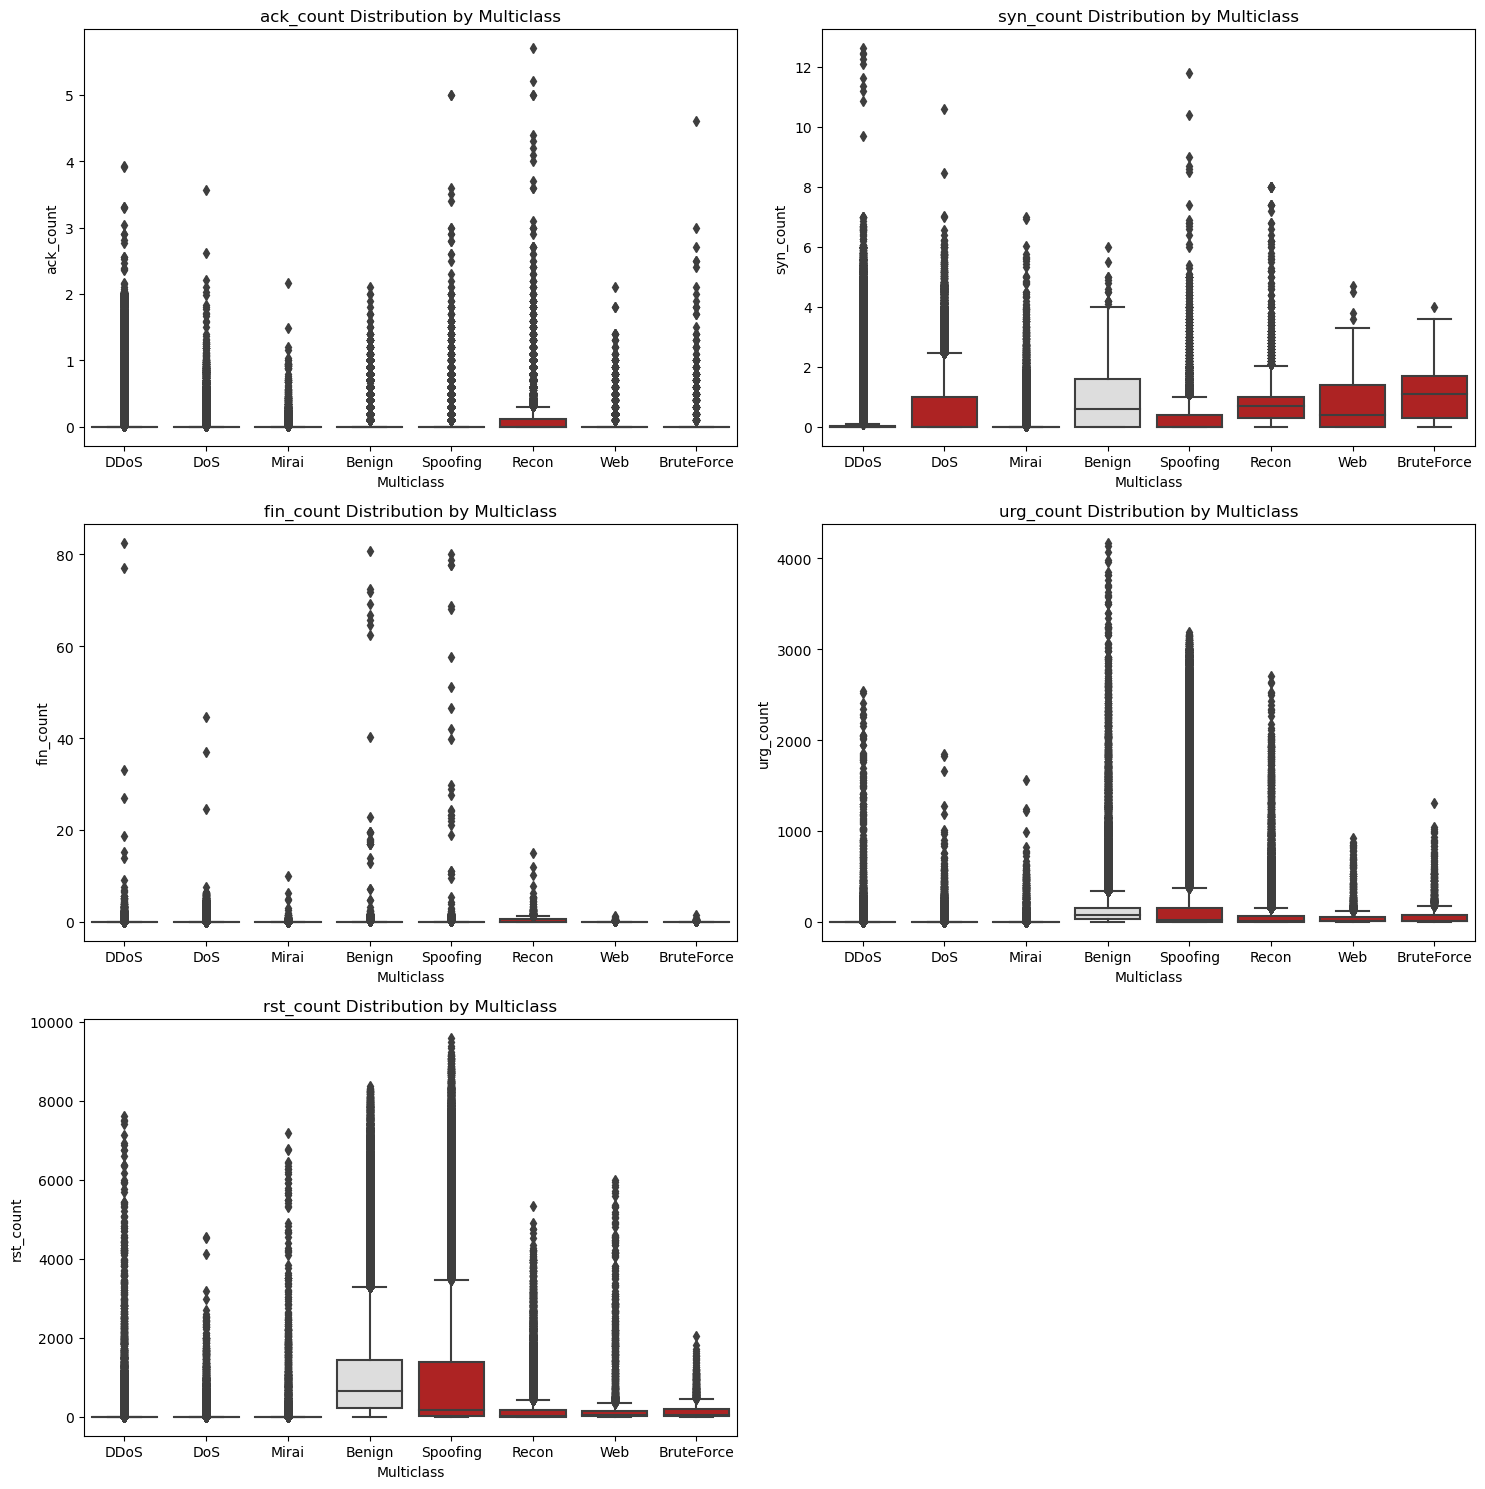

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the color palette
colors = {
    'DDoS': '#C40C0C',
    'DoS': '#C40C0C',
    'Mirai': '#C40C0C',
    'Benign': '#DDDDDD',  
    'Spoofing': '#C40C0C',
    'Recon': '#C40C0C',
    'Web': '#C40C0C',
    'BruteForce': '#C40C0C'
}

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot boxplots for each feature separated by multiclass
sns.boxplot(data=df, x='Multiclass', y='ack_count', ax=axes[0, 0], palette=colors)
axes[0, 0].set_title('ack_count Distribution by Multiclass')
axes[0, 0].set_xlabel('Multiclass')
axes[0, 0].set_ylabel('ack_count')

sns.boxplot(data=df, x='Multiclass', y='syn_count', ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('syn_count Distribution by Multiclass')
axes[0, 1].set_xlabel('Multiclass')
axes[0, 1].set_ylabel('syn_count')

sns.boxplot(data=df, x='Multiclass', y='fin_count', ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('fin_count Distribution by Multiclass')
axes[1, 0].set_xlabel('Multiclass')
axes[1, 0].set_ylabel('fin_count')

sns.boxplot(data=df, x='Multiclass', y='urg_count', ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('urg_count Distribution by Multiclass')
axes[1, 1].set_xlabel('Multiclass')
axes[1, 1].set_ylabel('urg_count')

sns.boxplot(data=df, x='Multiclass', y='rst_count', ax=axes[2, 0], palette=colors)
axes[2, 0].set_title('rst_count Distribution by Multiclass')
axes[2, 0].set_xlabel('Multiclass')
axes[2, 0].set_ylabel('rst_count')

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


## Protocol Features Analysis

### Binary Classification

In [26]:
# List of all protocols you're interested in
protocols = ['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']

# Initialize a dictionary to hold the results
results = {}

# Loop through each protocol and calculate the sum for each binary class
for protocol in protocols:
    grouped_data = df.groupby('Binary Class')[protocol].sum()
    results[protocol] = grouped_data

# Display the results
for protocol, data in results.items():
    print(f"Sum of {protocol} by Binary Class:")
    print(data)
    print()  # For better spacing in output

Sum of HTTP by Binary Class:
Binary Class
Attack    346274
Benign      6678
Name: HTTP, dtype: int64

Sum of HTTPS by Binary Class:
Binary Class
Attack    282355
Benign    122507
Name: HTTPS, dtype: int64

Sum of DNS by Binary Class:
Binary Class
Attack    640
Benign    322
Name: DNS, dtype: int64

Sum of Telnet by Binary Class:
Binary Class
Attack    0
Benign    0
Name: Telnet, dtype: int64

Sum of SMTP by Binary Class:
Binary Class
Attack    1
Benign    0
Name: SMTP, dtype: int64

Sum of SSH by Binary Class:
Binary Class
Attack    328
Benign      0
Name: SSH, dtype: int64

Sum of IRC by Binary Class:
Binary Class
Attack    0
Benign    0
Name: IRC, dtype: int64

Sum of TCP by Binary Class:
Binary Class
Attack    4057023
Benign     148503
Name: TCP, dtype: int64

Sum of UDP by Binary Class:
Binary Class
Attack    1543328
Benign      11771
Name: UDP, dtype: int64

Sum of DHCP by Binary Class:
Binary Class
Attack    15
Benign     0
Name: DHCP, dtype: int64

Sum of ARP by Binary Class:
Bi

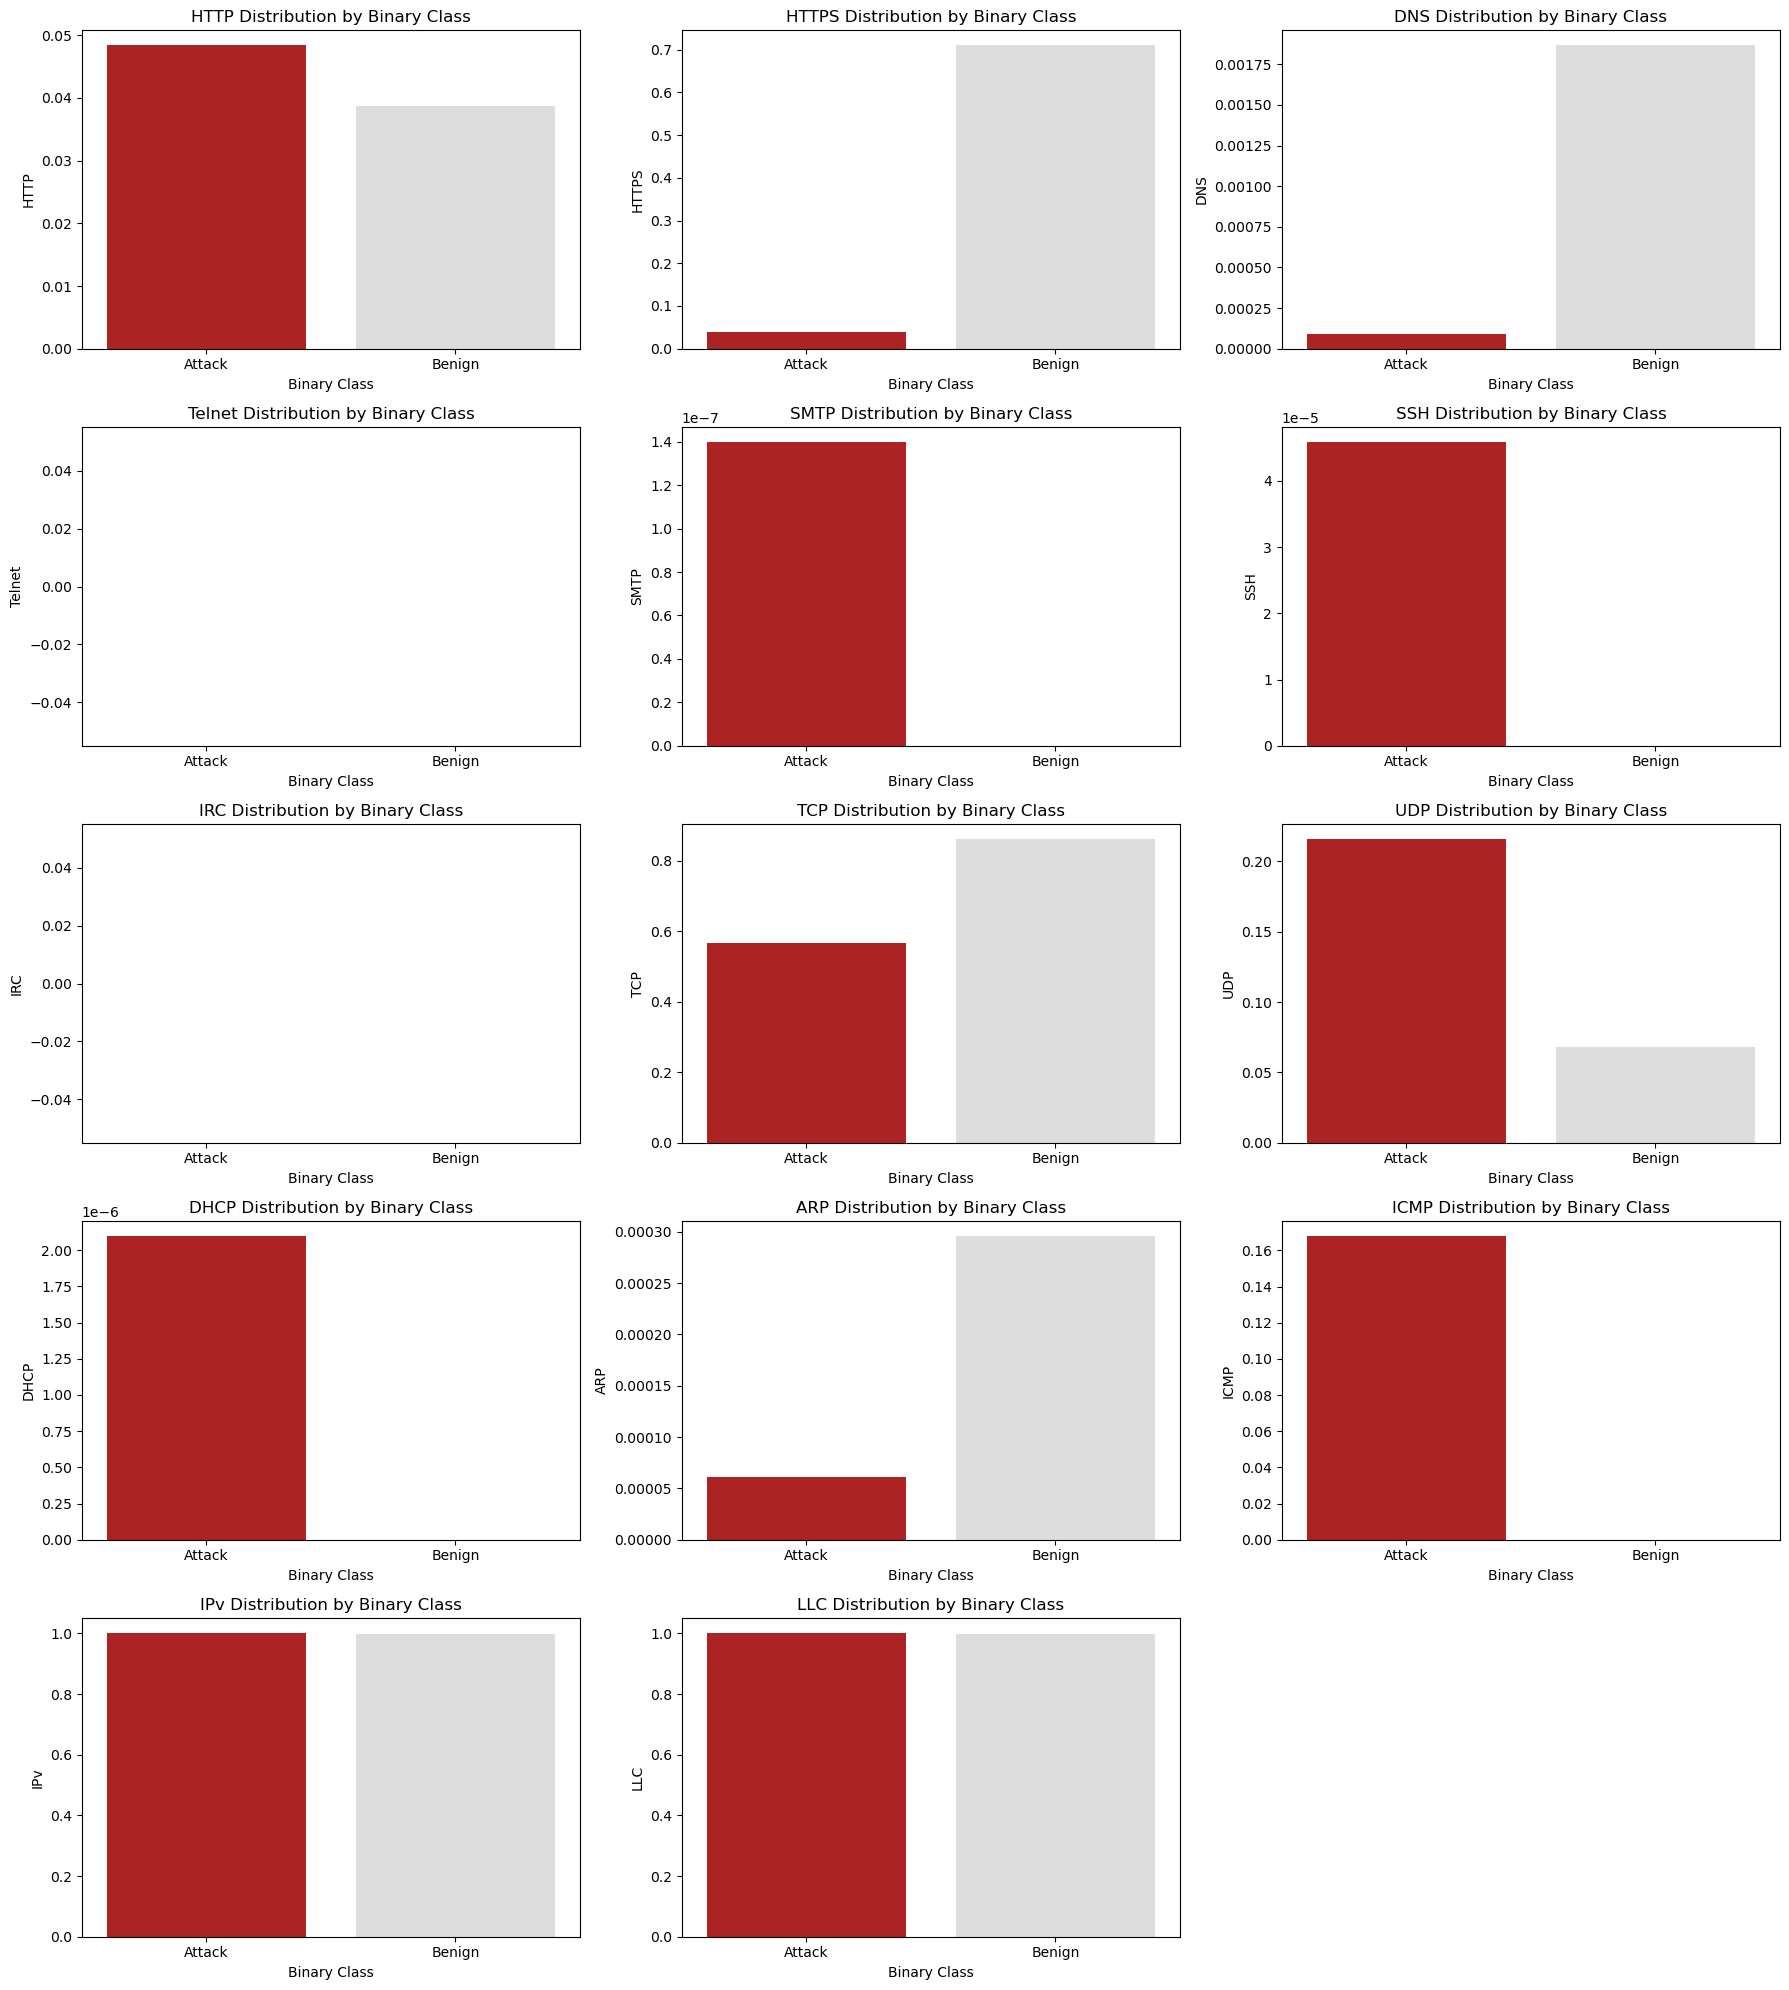

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
colors = {'Attack': '#C40C0C', 'Benign': '#DDDDDD'}
# Plot barplots for each feature separated by binary class
sns.barplot(data=df, x='Binary Class', y='HTTP', ax=axes[0, 0], ci=None, palette=colors)
axes[0, 0].set_title('HTTP Distribution by Binary Class')
axes[0, 0].set_xlabel('Binary Class')
axes[0, 0].set_ylabel('HTTP')

sns.barplot(data=df, x='Binary Class', y='HTTPS', ax=axes[0, 1], ci=None, palette=colors)
axes[0, 1].set_title('HTTPS Distribution by Binary Class')
axes[0, 1].set_xlabel('Binary Class')
axes[0, 1].set_ylabel('HTTPS')

sns.barplot(data=df, x='Binary Class', y='DNS', ax=axes[0, 2], ci=None, palette=colors)
axes[0, 2].set_title('DNS Distribution by Binary Class')
axes[0, 2].set_xlabel('Binary Class')
axes[0, 2].set_ylabel('DNS')

sns.barplot(data=df, x='Binary Class', y='Telnet', ax=axes[1, 0], ci=None, palette=colors)
axes[1, 0].set_title('Telnet Distribution by Binary Class')
axes[1, 0].set_xlabel('Binary Class')
axes[1, 0].set_ylabel('Telnet')

sns.barplot(data=df, x='Binary Class', y='SMTP', ax=axes[1, 1], ci=None, palette=colors)
axes[1, 1].set_title('SMTP Distribution by Binary Class')
axes[1, 1].set_xlabel('Binary Class')
axes[1, 1].set_ylabel('SMTP')

sns.barplot(data=df, x='Binary Class', y='SSH', ax=axes[1, 2], ci=None, palette=colors)
axes[1, 2].set_title('SSH Distribution by Binary Class')
axes[1, 2].set_xlabel('Binary Class')
axes[1, 2].set_ylabel('SSH')

sns.barplot(data=df, x='Binary Class', y='IRC', ax=axes[2, 0], ci=None, palette=colors)
axes[2, 0].set_title('IRC Distribution by Binary Class')
axes[2, 0].set_xlabel('Binary Class')
axes[2, 0].set_ylabel('IRC')

sns.barplot(data=df, x='Binary Class', y='TCP', ax=axes[2, 1], ci=None, palette=colors)
axes[2, 1].set_title('TCP Distribution by Binary Class')
axes[2, 1].set_xlabel('Binary Class')
axes[2, 1].set_ylabel('TCP')

sns.barplot(data=df, x='Binary Class', y='UDP', ax=axes[2, 2], ci=None, palette=colors)
axes[2, 2].set_title('UDP Distribution by Binary Class')
axes[2, 2].set_xlabel('Binary Class')
axes[2, 2].set_ylabel('UDP')

sns.barplot(data=df, x='Binary Class', y='DHCP', ax=axes[3, 0], ci=None, palette=colors)
axes[3, 0].set_title('DHCP Distribution by Binary Class')
axes[3, 0].set_xlabel('Binary Class')
axes[3, 0].set_ylabel('DHCP')

sns.barplot(data=df, x='Binary Class', y='ARP', ax=axes[3, 1], ci=None, palette=colors)
axes[3, 1].set_title('ARP Distribution by Binary Class')
axes[3, 1].set_xlabel('Binary Class')
axes[3, 1].set_ylabel('ARP')

sns.barplot(data=df, x='Binary Class', y='ICMP', ax=axes[3, 2], ci=None, palette=colors)
axes[3, 2].set_title('ICMP Distribution by Binary Class')
axes[3, 2].set_xlabel('Binary Class')
axes[3, 2].set_ylabel('ICMP')

sns.barplot(data=df, x='Binary Class', y='IPv', ax=axes[4, 0], ci=None, palette=colors)
axes[4, 0].set_title('IPv Distribution by Binary Class')
axes[4, 0].set_xlabel('Binary Class')
axes[4, 0].set_ylabel('IPv')

sns.barplot(data=df, x='Binary Class', y='LLC', ax=axes[4, 1], ci=None, palette=colors)
axes[4, 1].set_title('LLC Distribution by Binary Class')
axes[4, 1].set_xlabel('Binary Class')
axes[4, 1].set_ylabel('LLC')

# Hide the empty subplot
axes[4, 2].axis('off')

plt.tight_layout()
plt.show()


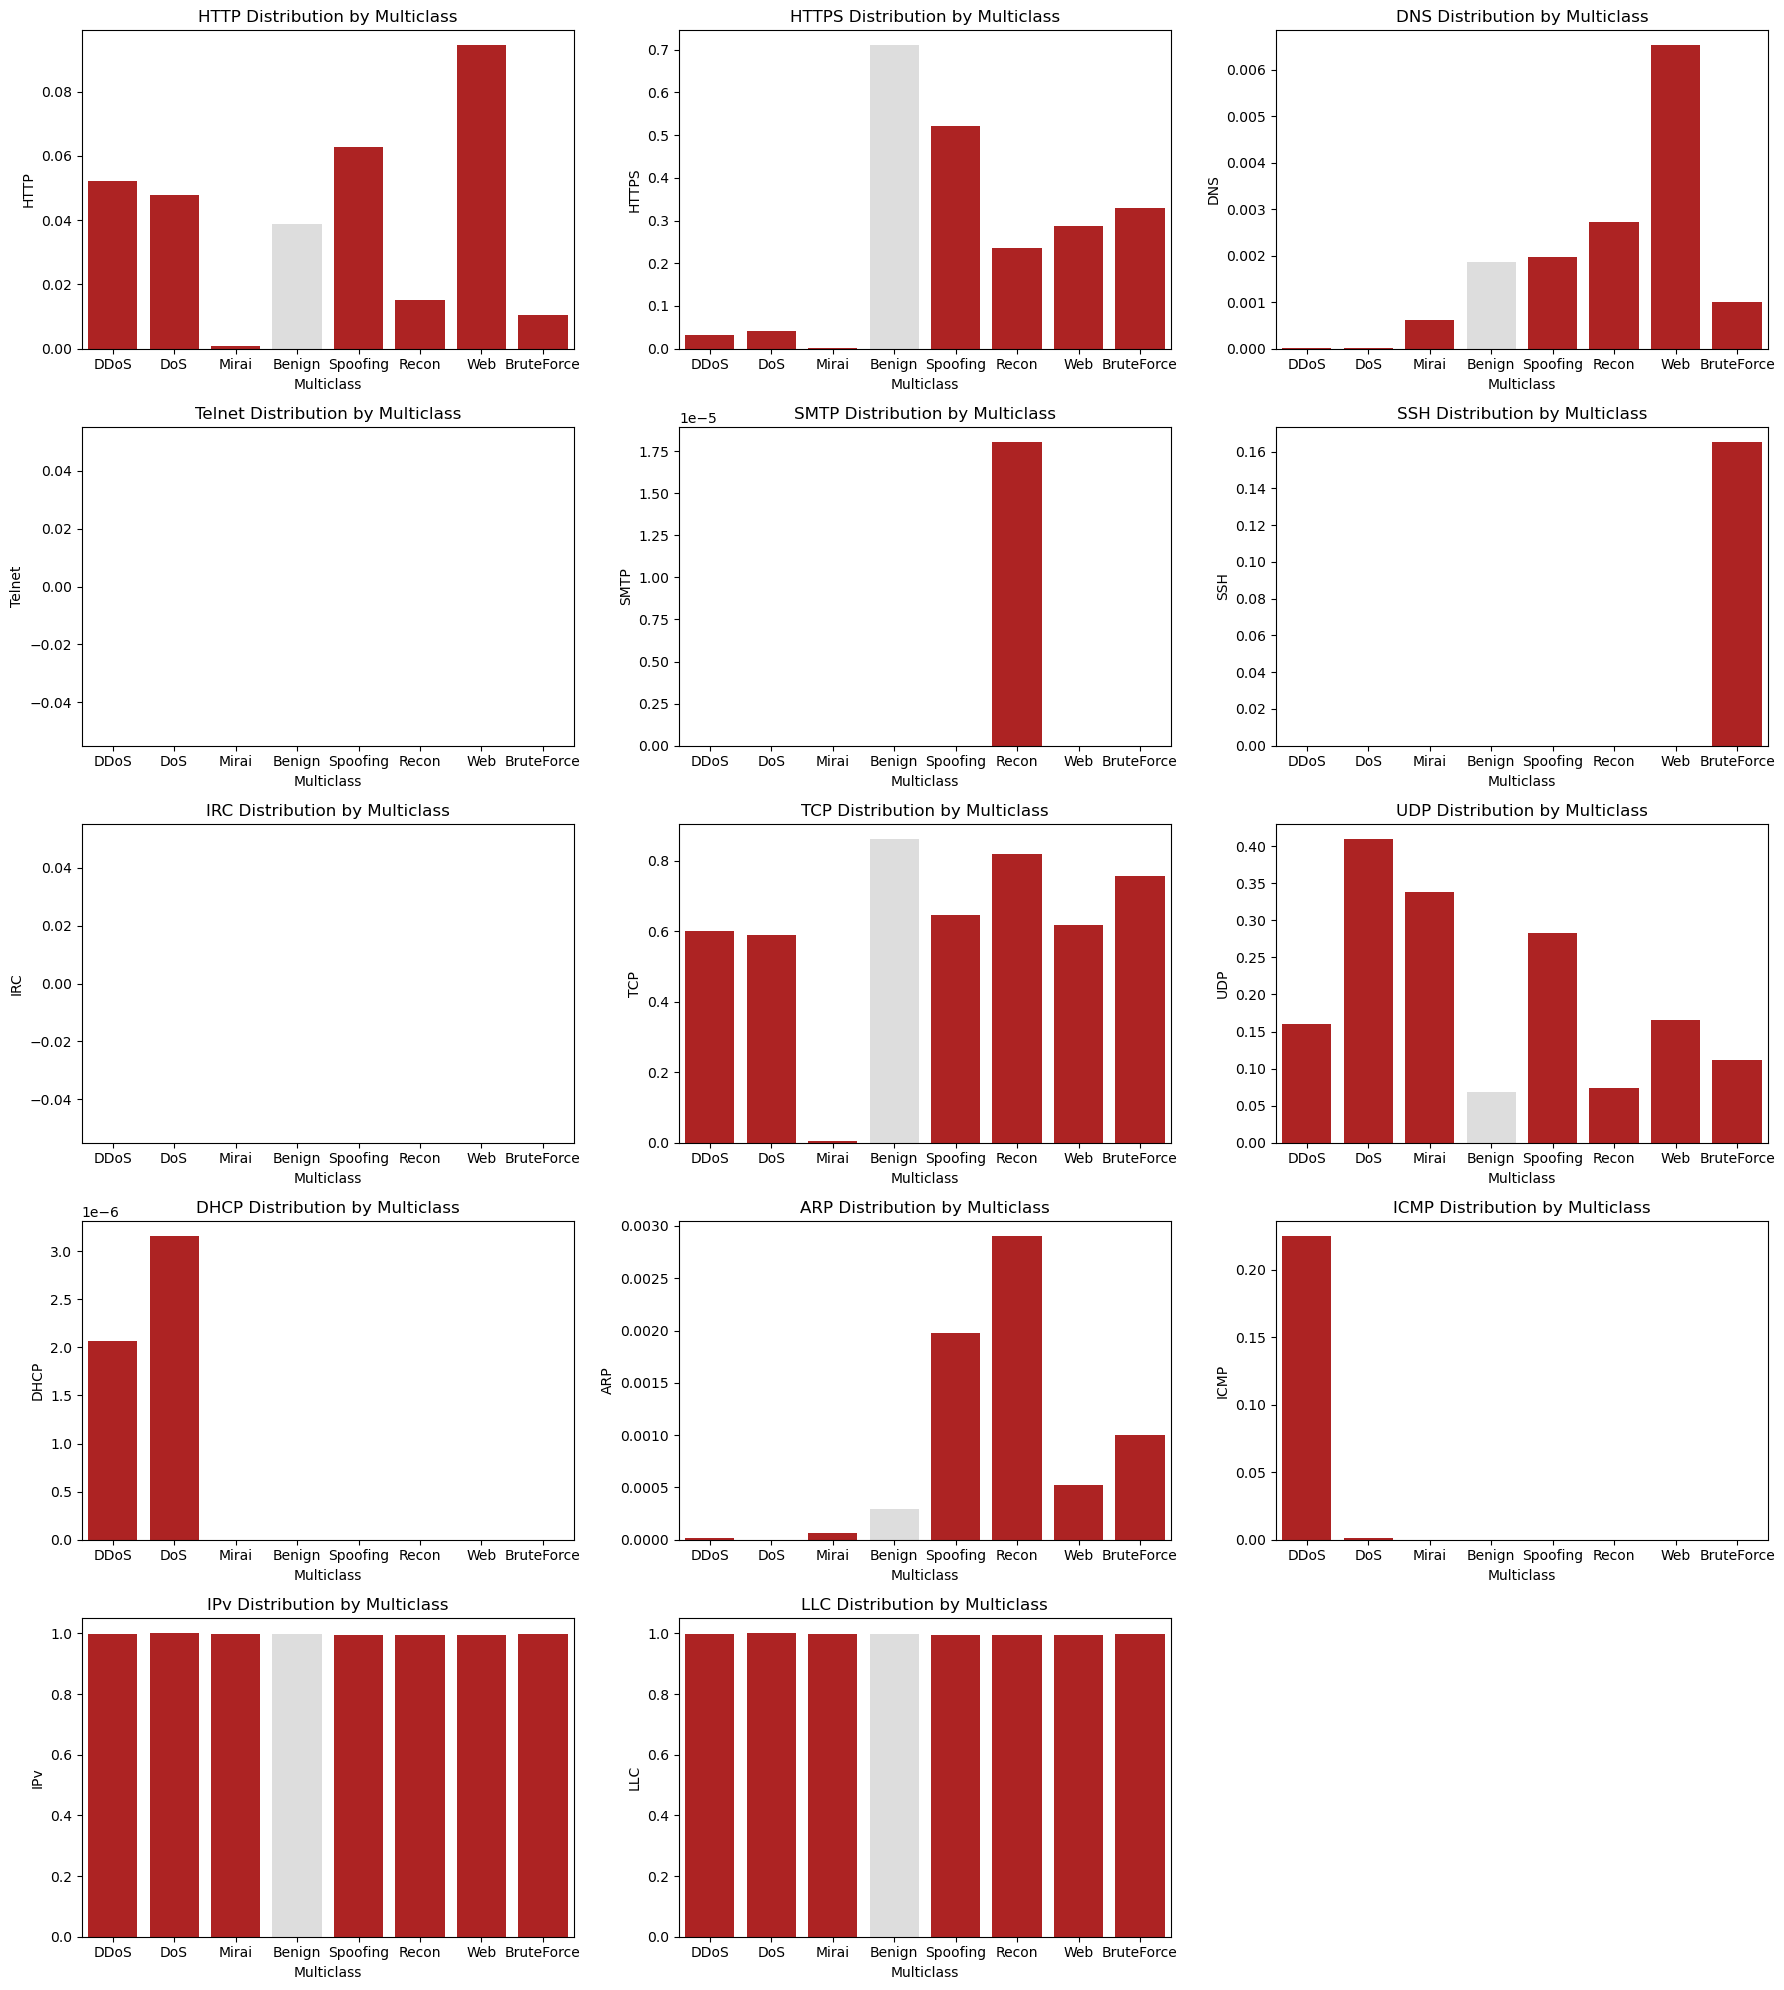

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
colors = {
    'DDoS': '#C40C0C',
    'DoS': '#C40C0C',
    'Mirai': '#C40C0C',
    'Benign': '#DDDDDD',  
    'Spoofing': '#C40C0C',
    'Recon': '#C40C0C',
    'Web': '#C40C0C',
    'BruteForce': '#C40C0C'
}

# Plot barplots for each feature separated by multiclass
sns.barplot(data=df, x='Multiclass', y='HTTP', ax=axes[0, 0], ci=None, palette=colors)
axes[0, 0].set_title('HTTP Distribution by Multiclass')
axes[0, 0].set_xlabel('Multiclass')
axes[0, 0].set_ylabel('HTTP')

sns.barplot(data=df, x='Multiclass', y='HTTPS', ax=axes[0, 1], ci=None, palette=colors)
axes[0, 1].set_title('HTTPS Distribution by Multiclass')
axes[0, 1].set_xlabel('Multiclass')
axes[0, 1].set_ylabel('HTTPS')

sns.barplot(data=df, x='Multiclass', y='DNS', ax=axes[0, 2], ci=None, palette=colors)
axes[0, 2].set_title('DNS Distribution by Multiclass')
axes[0, 2].set_xlabel('Multiclass')
axes[0, 2].set_ylabel('DNS')

sns.barplot(data=df, x='Multiclass', y='Telnet', ax=axes[1, 0], ci=None, palette=colors)
axes[1, 0].set_title('Telnet Distribution by Multiclass')
axes[1, 0].set_xlabel('Multiclass')
axes[1, 0].set_ylabel('Telnet')

sns.barplot(data=df, x='Multiclass', y='SMTP', ax=axes[1, 1], ci=None, palette=colors)
axes[1, 1].set_title('SMTP Distribution by Multiclass')
axes[1, 1].set_xlabel('Multiclass')
axes[1, 1].set_ylabel('SMTP')

sns.barplot(data=df, x='Multiclass', y='SSH', ax=axes[1, 2], ci=None, palette=colors)
axes[1, 2].set_title('SSH Distribution by Multiclass')
axes[1, 2].set_xlabel('Multiclass')
axes[1, 2].set_ylabel('SSH')

sns.barplot(data=df, x='Multiclass', y='IRC', ax=axes[2, 0], ci=None, palette=colors)
axes[2, 0].set_title('IRC Distribution by Multiclass')
axes[2, 0].set_xlabel('Multiclass')
axes[2, 0].set_ylabel('IRC')

sns.barplot(data=df, x='Multiclass', y='TCP', ax=axes[2, 1], ci=None, palette=colors)
axes[2, 1].set_title('TCP Distribution by Multiclass')
axes[2, 1].set_xlabel('Multiclass')
axes[2, 1].set_ylabel('TCP')

sns.barplot(data=df, x='Multiclass', y='UDP', ax=axes[2, 2], ci=None, palette=colors)
axes[2, 2].set_title('UDP Distribution by Multiclass')
axes[2, 2].set_xlabel('Multiclass')
axes[2, 2].set_ylabel('UDP')

sns.barplot(data=df, x='Multiclass', y='DHCP', ax=axes[3, 0], ci=None, palette=colors)
axes[3, 0].set_title('DHCP Distribution by Multiclass')
axes[3, 0].set_xlabel('Multiclass')
axes[3, 0].set_ylabel('DHCP')

sns.barplot(data=df, x='Multiclass', y='ARP', ax=axes[3, 1], ci=None, palette=colors)
axes[3, 1].set_title('ARP Distribution by Multiclass')
axes[3, 1].set_xlabel('Multiclass')
axes[3, 1].set_ylabel('ARP')

sns.barplot(data=df, x='Multiclass', y='ICMP', ax=axes[3, 2], ci=None, palette=colors)
axes[3, 2].set_title('ICMP Distribution by Multiclass')
axes[3, 2].set_xlabel('Multiclass')
axes[3, 2].set_ylabel('ICMP')

sns.barplot(data=df, x='Multiclass', y='IPv', ax=axes[4, 0], ci=None, palette=colors)
axes[4, 0].set_title('IPv Distribution by Multiclass')
axes[4, 0].set_xlabel('Multiclass')
axes[4, 0].set_ylabel('IPv')

sns.barplot(data=df, x='Multiclass', y='LLC', ax=axes[4, 1], ci=None, palette=colors)
axes[4, 1].set_title('LLC Distribution by Multiclass')
axes[4, 1].set_xlabel('Multiclass')
axes[4, 1].set_ylabel('LLC')

# Hide the empty subplot
axes[4, 2].axis('off')

plt.tight_layout()
plt.show()



## Statistical Pattern Analysis

### Binary Classification

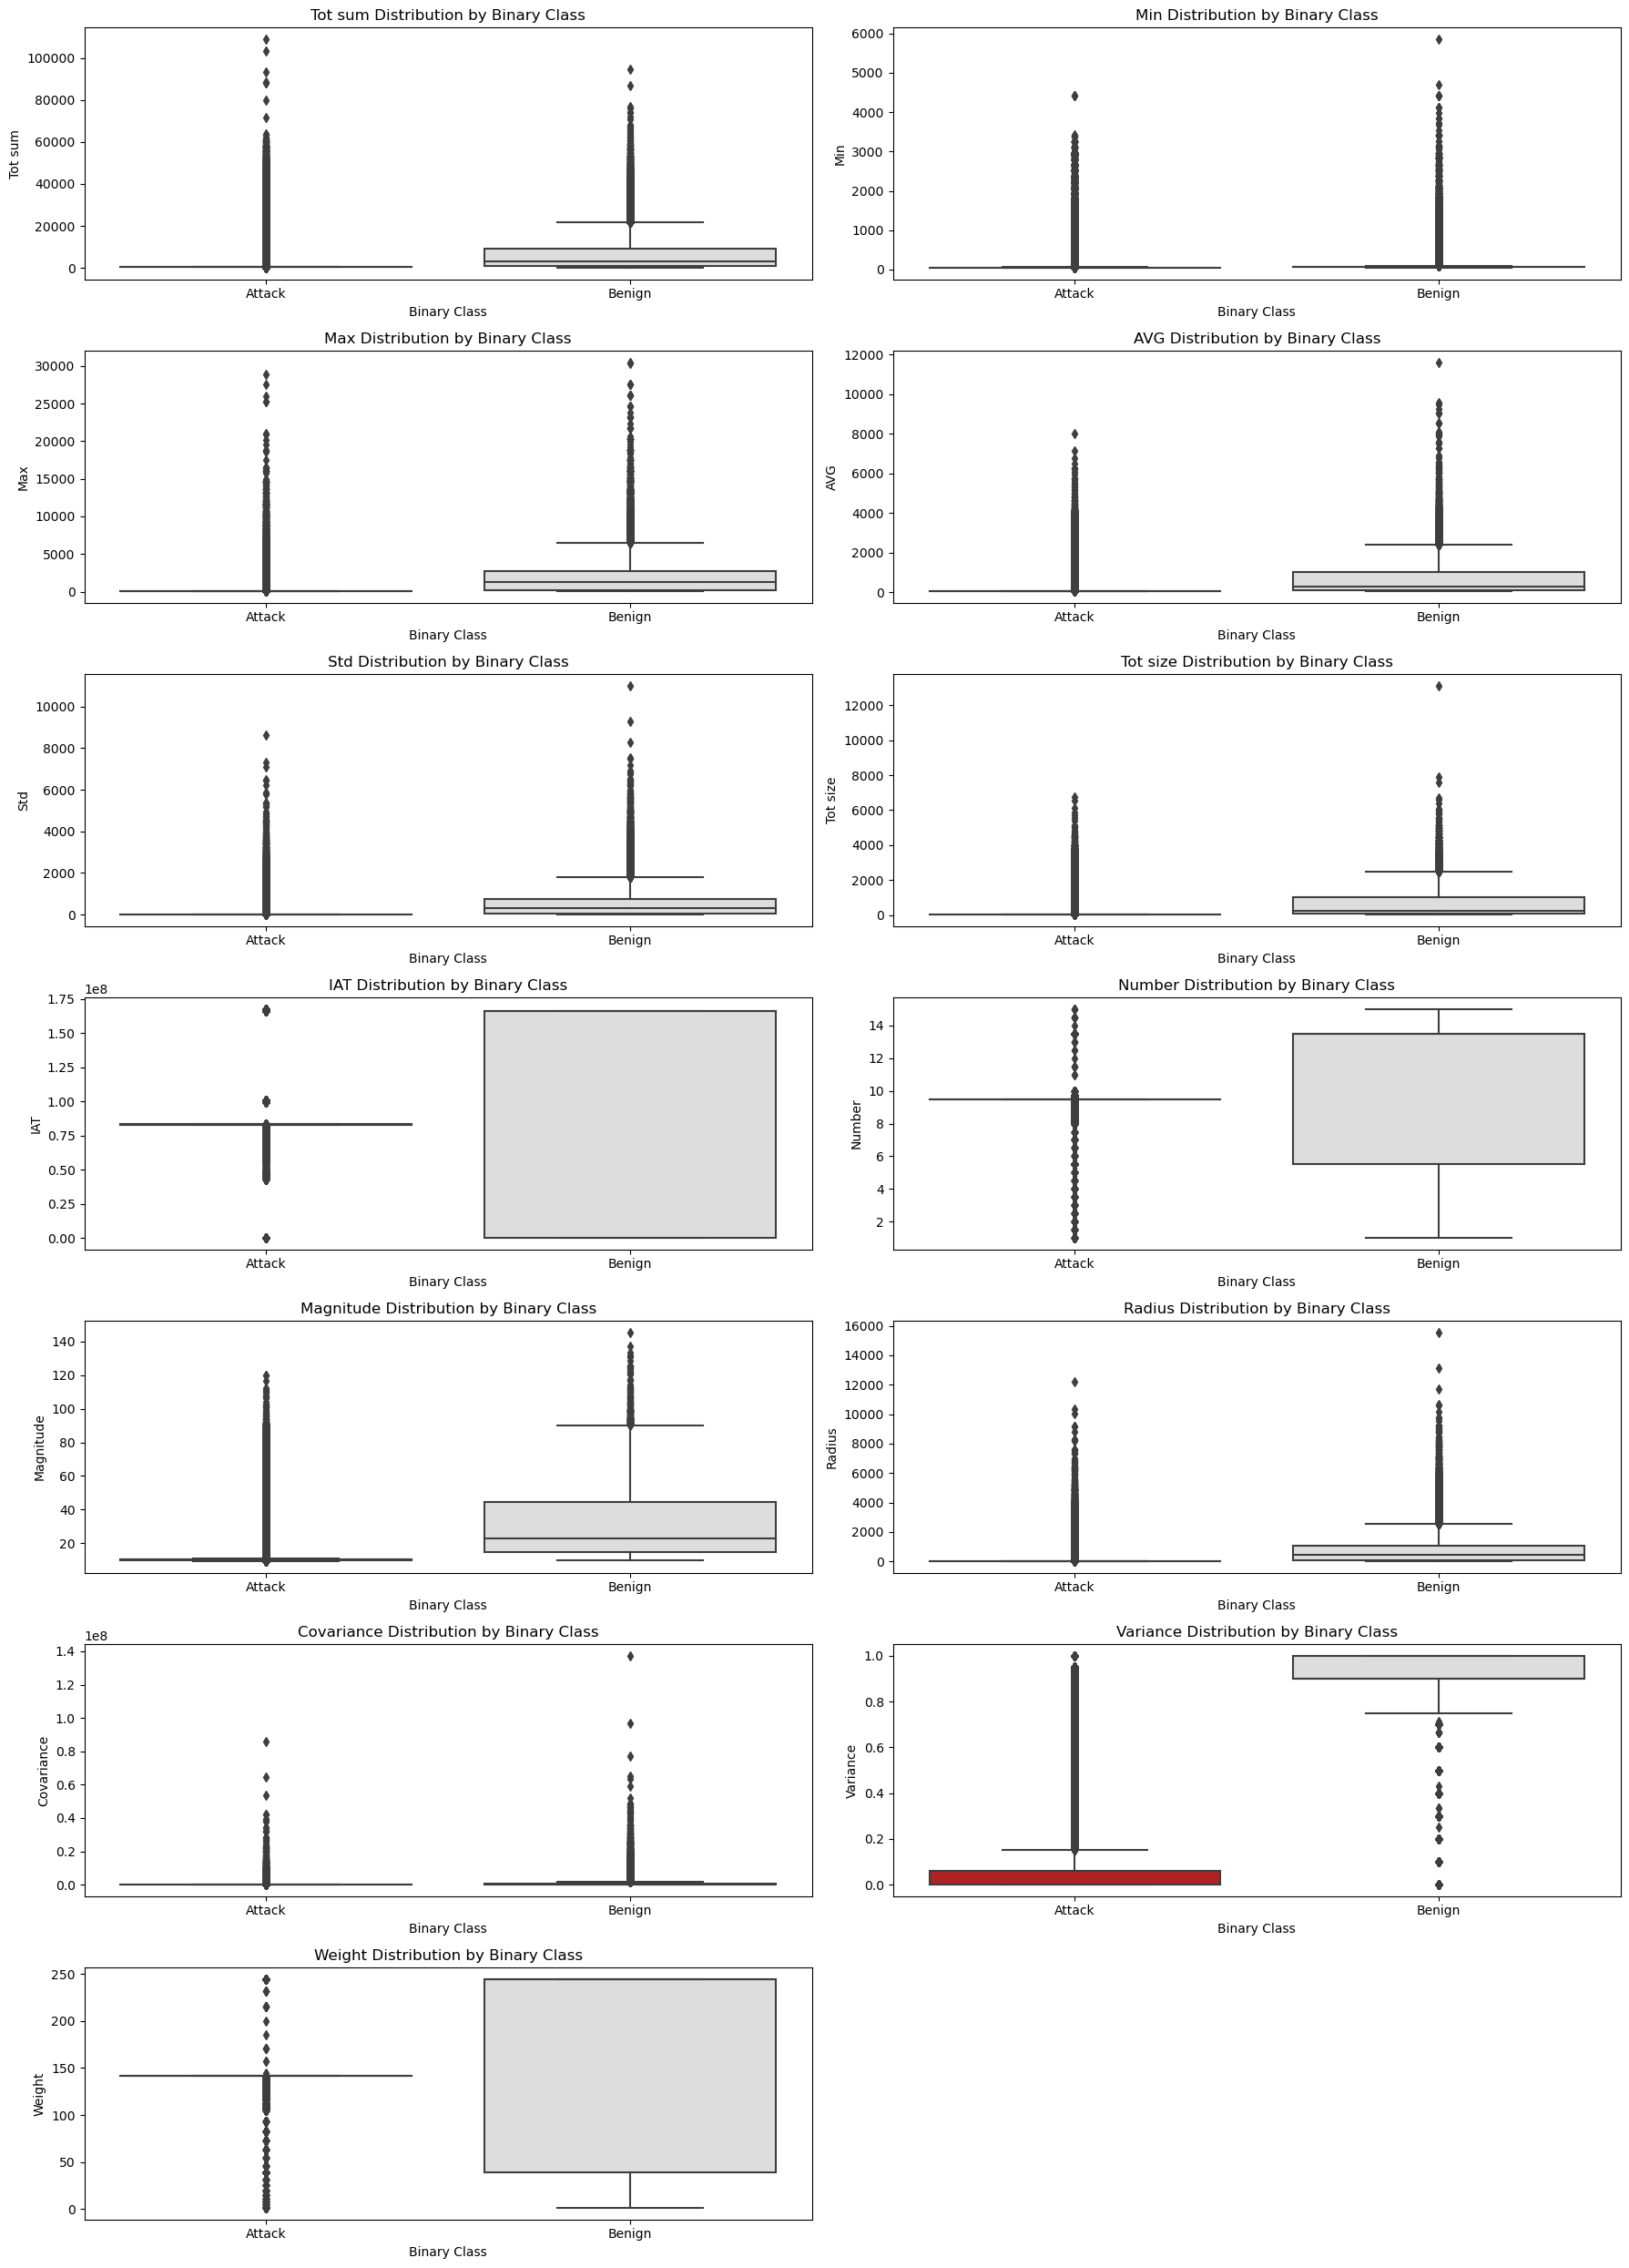

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(18, 25))
colors = {'Attack': '#C40C0C', 'Benign': '#DDDDDD'}

# Plot box plots for each feature separated by binary class
sns.boxplot(data=df, x='Binary Class', y='Tot sum', ax=axes[0, 0], palette=colors)
axes[0, 0].set_title('Tot sum Distribution by Binary Class')
axes[0, 0].set_xlabel('Binary Class')
axes[0, 0].set_ylabel('Tot sum')

sns.boxplot(data=df, x='Binary Class', y='Min', ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('Min Distribution by Binary Class')
axes[0, 1].set_xlabel('Binary Class')
axes[0, 1].set_ylabel('Min')

sns.boxplot(data=df, x='Binary Class', y='Max', ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('Max Distribution by Binary Class')
axes[1, 0].set_xlabel('Binary Class')
axes[1, 0].set_ylabel('Max')

sns.boxplot(data=df, x='Binary Class', y='AVG', ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('AVG Distribution by Binary Class')
axes[1, 1].set_xlabel('Binary Class')
axes[1, 1].set_ylabel('AVG')

sns.boxplot(data=df, x='Binary Class', y='Std', ax=axes[2, 0], palette=colors)
axes[2, 0].set_title('Std Distribution by Binary Class')
axes[2, 0].set_xlabel('Binary Class')
axes[2, 0].set_ylabel('Std')

sns.boxplot(data=df, x='Binary Class', y='Tot size', ax=axes[2, 1], palette=colors)
axes[2, 1].set_title('Tot size Distribution by Binary Class')
axes[2, 1].set_xlabel('Binary Class')
axes[2, 1].set_ylabel('Tot size')

sns.boxplot(data=df, x='Binary Class', y='IAT', ax=axes[3, 0], palette=colors)
axes[3, 0].set_title('IAT Distribution by Binary Class')
axes[3, 0].set_xlabel('Binary Class')
axes[3, 0].set_ylabel('IAT')

sns.boxplot(data=df, x='Binary Class', y='Number', ax=axes[3, 1], palette=colors)
axes[3, 1].set_title('Number Distribution by Binary Class')
axes[3, 1].set_xlabel('Binary Class')
axes[3, 1].set_ylabel('Number')

sns.boxplot(data=df, x='Binary Class', y='Magnitude', ax=axes[4, 0], palette=colors)
axes[4, 0].set_title('Magnitude Distribution by Binary Class')
axes[4, 0].set_xlabel('Binary Class')
axes[4, 0].set_ylabel('Magnitude')

sns.boxplot(data=df, x='Binary Class', y='Radius', ax=axes[4, 1], palette=colors)
axes[4, 1].set_title('Radius Distribution by Binary Class')
axes[4, 1].set_xlabel('Binary Class')
axes[4, 1].set_ylabel('Radius')

sns.boxplot(data=df, x='Binary Class', y='Covariance', ax=axes[5, 0], palette=colors)
axes[5, 0].set_title('Covariance Distribution by Binary Class')
axes[5, 0].set_xlabel('Binary Class')
axes[5, 0].set_ylabel('Covariance')

sns.boxplot(data=df, x='Binary Class', y='Variance', ax=axes[5, 1], palette=colors)
axes[5, 1].set_title('Variance Distribution by Binary Class')
axes[5, 1].set_xlabel('Binary Class')
axes[5, 1].set_ylabel('Variance')

sns.boxplot(data=df, x='Binary Class', y='Weight', ax=axes[6, 0], palette=colors)
axes[6, 0].set_title('Weight Distribution by Binary Class')
axes[6, 0].set_xlabel('Binary Class')
axes[6, 0].set_ylabel('Weight')

# Hide the empty subplot
axes[6, 1].axis('off')

plt.tight_layout()
plt.show()


### Multiclass Classification

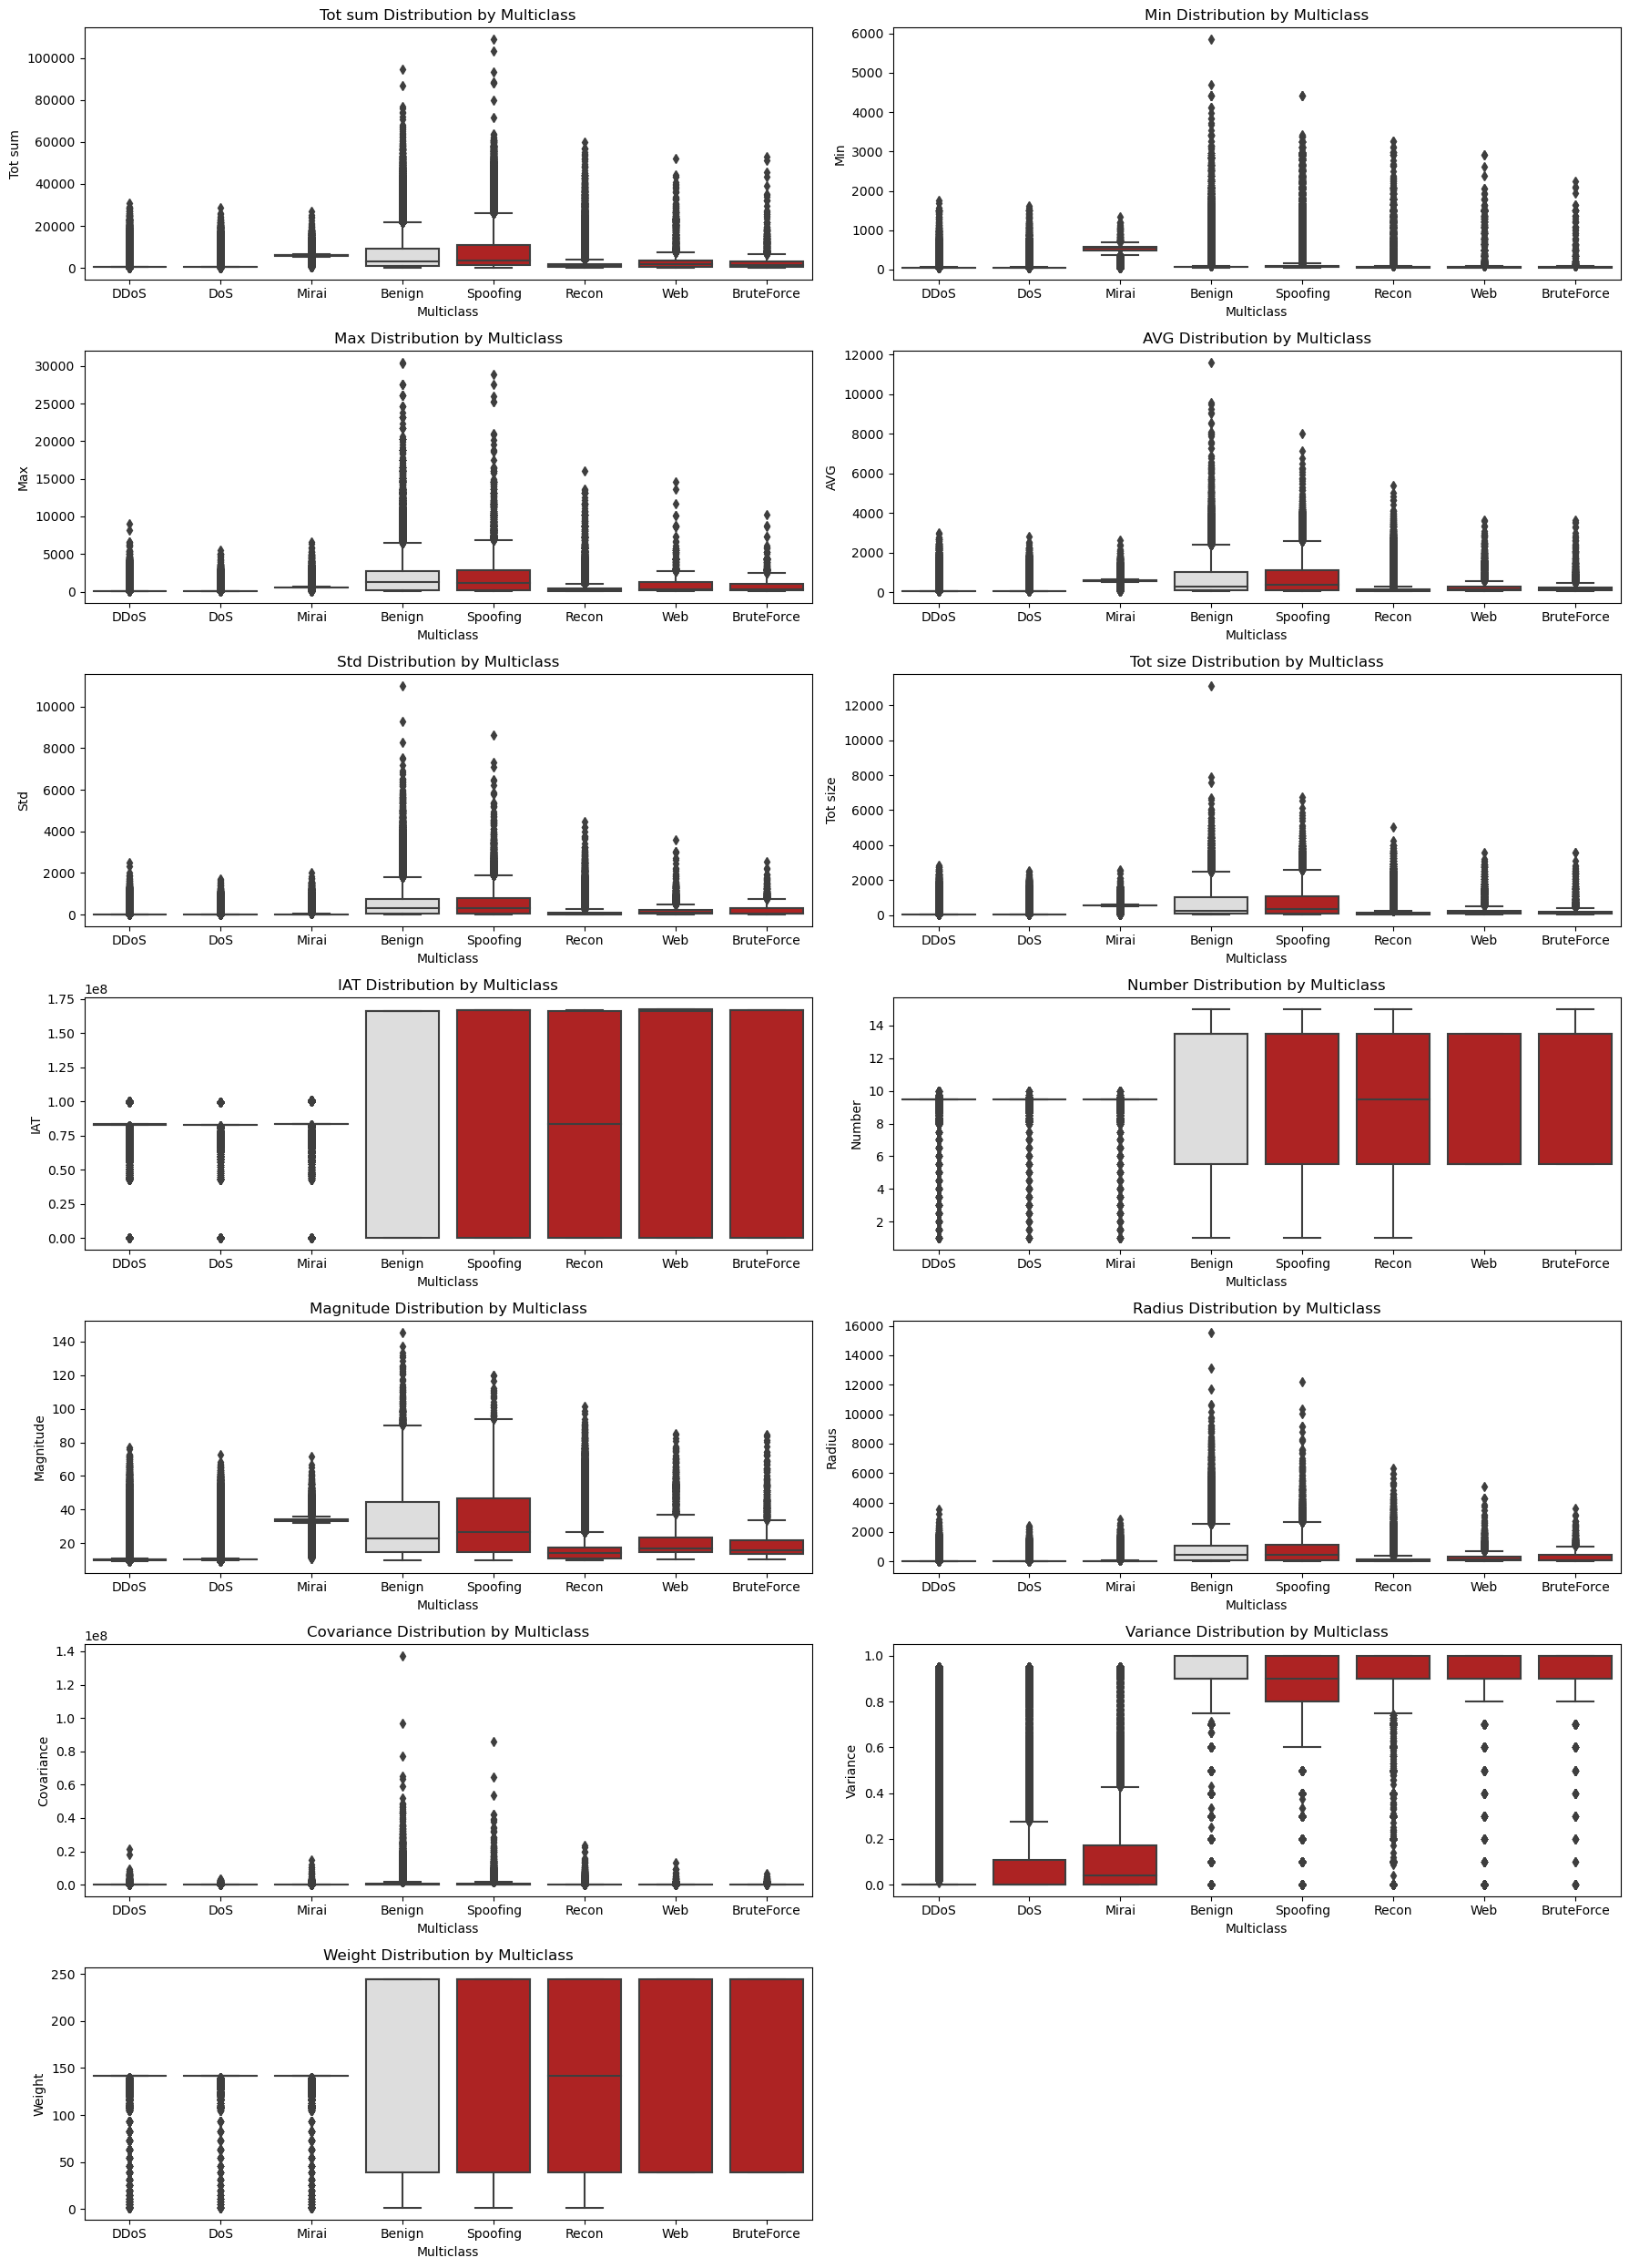

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = {
    'DDoS': '#C40C0C',
    'DoS': '#C40C0C',
    'Mirai': '#C40C0C',
    'Benign': '#DDDDDD',  
    'Spoofing': '#C40C0C',
    'Recon': '#C40C0C',
    'Web': '#C40C0C',
    'BruteForce': '#C40C0C'
}

# Set up the figure and axes
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(18, 25))

# Plot box plots for each feature separated by multiclass
sns.boxplot(data=df, x='Multiclass', y='Tot sum', ax=axes[0, 0], palette=colors)
axes[0, 0].set_title('Tot sum Distribution by Multiclass')
axes[0, 0].set_xlabel('Multiclass')
axes[0, 0].set_ylabel('Tot sum')

sns.boxplot(data=df, x='Multiclass', y='Min', ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('Min Distribution by Multiclass')
axes[0, 1].set_xlabel('Multiclass')
axes[0, 1].set_ylabel('Min')

sns.boxplot(data=df, x='Multiclass', y='Max', ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('Max Distribution by Multiclass')
axes[1, 0].set_xlabel('Multiclass')
axes[1, 0].set_ylabel('Max')

sns.boxplot(data=df, x='Multiclass', y='AVG', ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('AVG Distribution by Multiclass')
axes[1, 1].set_xlabel('Multiclass')
axes[1, 1].set_ylabel('AVG')

sns.boxplot(data=df, x='Multiclass', y='Std', ax=axes[2, 0], palette=colors)
axes[2, 0].set_title('Std Distribution by Multiclass')
axes[2, 0].set_xlabel('Multiclass')
axes[2, 0].set_ylabel('Std')

sns.boxplot(data=df, x='Multiclass', y='Tot size', ax=axes[2, 1], palette=colors)
axes[2, 1].set_title('Tot size Distribution by Multiclass')
axes[2, 1].set_xlabel('Multiclass')
axes[2, 1].set_ylabel('Tot size')

sns.boxplot(data=df, x='Multiclass', y='IAT', ax=axes[3, 0], palette=colors)
axes[3, 0].set_title('IAT Distribution by Multiclass')
axes[3, 0].set_xlabel('Multiclass')
axes[3, 0].set_ylabel('IAT')

sns.boxplot(data=df, x='Multiclass', y='Number', ax=axes[3, 1], palette=colors)
axes[3, 1].set_title('Number Distribution by Multiclass')
axes[3, 1].set_xlabel('Multiclass')
axes[3, 1].set_ylabel('Number')

sns.boxplot(data=df, x='Multiclass', y='Magnitude', ax=axes[4, 0], palette=colors)
axes[4, 0].set_title('Magnitude Distribution by Multiclass')
axes[4, 0].set_xlabel('Multiclass')
axes[4, 0].set_ylabel('Magnitude')

sns.boxplot(data=df, x='Multiclass', y='Radius', ax=axes[4, 1], palette=colors)
axes[4, 1].set_title('Radius Distribution by Multiclass')
axes[4, 1].set_xlabel('Multiclass')
axes[4, 1].set_ylabel('Radius')

sns.boxplot(data=df, x='Multiclass', y='Covariance', ax=axes[5, 0], palette=colors)
axes[5, 0].set_title('Covariance Distribution by Multiclass')
axes[5, 0].set_xlabel('Multiclass')
axes[5, 0].set_ylabel('Covariance')

sns.boxplot(data=df, x='Multiclass', y='Variance', ax=axes[5, 1], palette=colors)
axes[5, 1].set_title('Variance Distribution by Multiclass')
axes[5, 1].set_xlabel('Multiclass')
axes[5, 1].set_ylabel('Variance')

sns.boxplot(data=df, x='Multiclass', y='Weight', ax=axes[6, 0], palette=colors)
axes[6, 0].set_title('Weight Distribution by Multiclass')
axes[6, 0].set_xlabel('Multiclass')
axes[6, 0].set_ylabel('Weight')

# Hide the empty subplot
axes[6, 1].axis('off')

plt.tight_layout()
plt.show()


## Analysis of Class Distribution

### Binary Classification

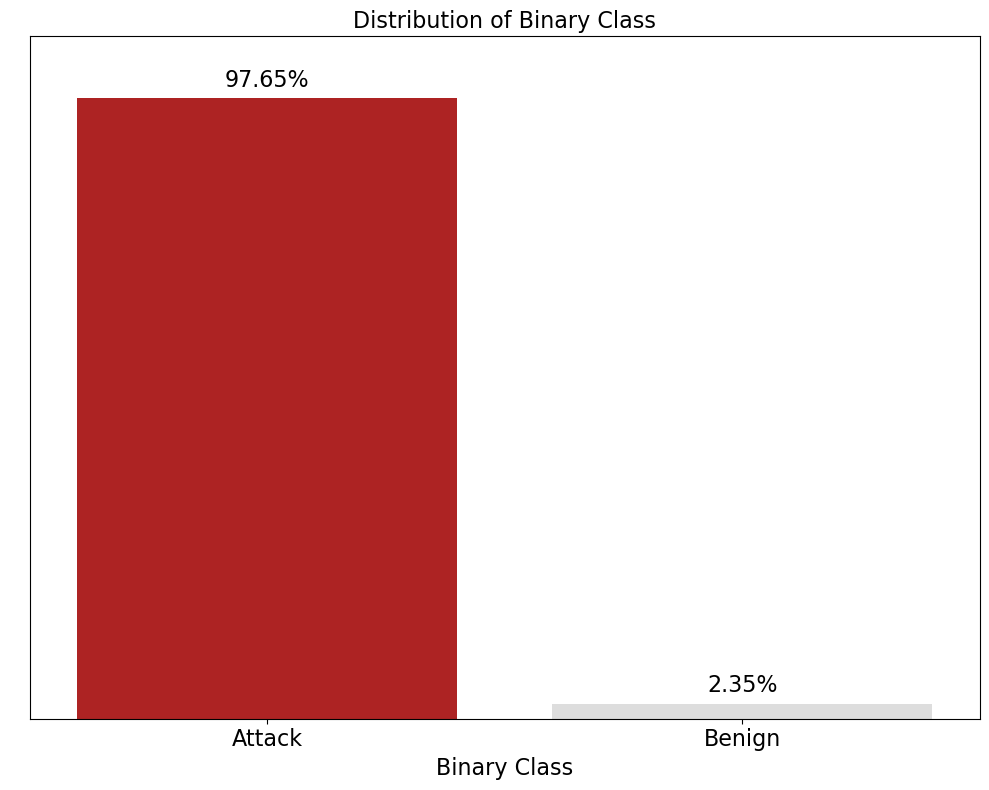

In [31]:
class_counts = df['Binary Class'].value_counts()
colors = {'Attack': '#C40C0C', 'Benign': '#DDDDDD'}
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 8))  # Increased figure size for better readability
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette=colors)  # Changed palette for better contrast
plt.title('Distribution of Binary Class', fontsize=16)
plt.xlabel('Binary Class', fontsize=16)
plt.ylabel(' ')
plt.xticks(rotation=0, fontsize=16)  
plt.yticks([])

# Set a variable for the maximum height of the y-axis, slightly more than the highest bar
max_height = max(class_counts.values) * 1.1
plt.ylim(0, max_height)  # Set the y-axis limit to accommodate the percentage annotations

# Add percentage labels on top of the bars
total_count = len(df['Binary Class'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Set the vertical offset for the annotations to be 1% of the max height of the y-axis
    vertical_offset = max_height * 0.01
    ax.annotate(percentage, (x, y + vertical_offset), ha='center', va='bottom', color='black', fontsize=16)  # Adjusted text properties

plt.tight_layout();

 ### Multiclass Classification

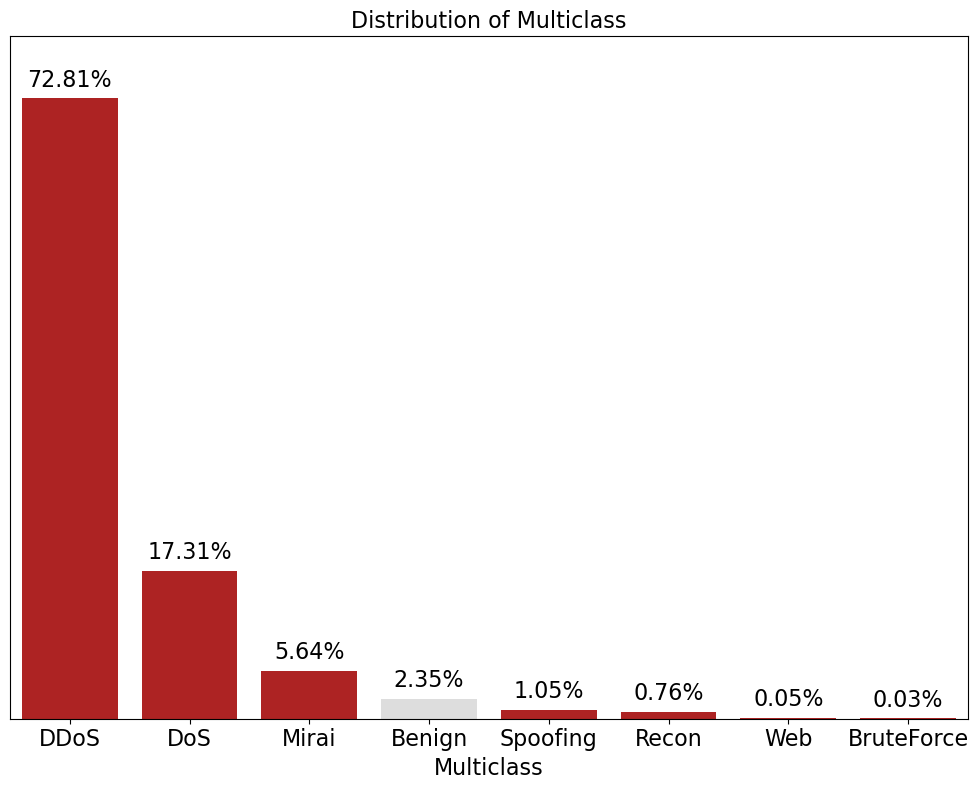

In [32]:
class_counts = df['Multiclass'].value_counts()
palette = {
    'DDoS': '#C40C0C',
    'DoS': '#C40C0C',
    'Mirai': '#C40C0C',
    'Benign': '#DDDDDD',  
    'Spoofing': '#C40C0C',
    'Recon': '#C40C0C',
    'Web': '#C40C0C',
    'BruteForce': '#C40C0C'
}
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 8))  # Increased figure size for better readability
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette=palette)  # Changed palette for better contrast
plt.title('Distribution of Multiclass', fontsize=16)
plt.xlabel('Multiclass', fontsize=16)
plt.xticks(rotation=0, fontsize=16)  
plt.yticks([])

# Set a variable for the maximum height of the y-axis, slightly more than the highest bar
max_height = max(class_counts.values) * 1.1
plt.ylim(0, max_height)  # Set the y-axis limit to accommodate the percentage annotations

# Add percentage labels on top of the bars
total_count = len(df['Multiclass'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Set the vertical offset for the annotations to be 1% of the max height of the y-axis
    vertical_offset = max_height * 0.01
    ax.annotate(percentage, (x, y + vertical_offset), ha='center', va='bottom', color='black', fontsize=16)  # Adjusted text properties

plt.tight_layout();